In [34]:
import os
import IPython
import IPython.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
import h5py

In [35]:
with open('Trois_billes_Case3_slope.csv', 'r', encoding='utf-8-sig') as f:
    inputs1=np.genfromtxt(f, dtype=float, delimiter=',')
inputs=inputs1[1:,:]
print(inputs)

[[ 0.00000000e+00  2.00000000e+00  2.00000000e+00  1.00000000e+00
   3.00000000e+00]
 [ 5.00050005e-02  1.90209360e+00  1.99845780e+00  9.97016700e-01
   3.00000000e+00]
 [ 1.00010001e-01  1.61796010e+00  1.99383340e+00  9.87885900e-01
   3.00500100e+00]
 ...
 [ 4.99899990e+02  1.61796010e+00 -1.99383340e+00  1.98748590e+00
   9.94514000e+00]
 [ 4.99949995e+02  1.90209360e+00 -1.99845780e+00  1.99681680e+00
   9.83051200e+00]
 [ 5.00000000e+02  2.00000000e+00 -2.00000000e+00  2.00000000e+00
   9.71161400e+00]]


[[1.       ]
 [0.9970167]
 [0.9878859]
 ...
 [1.9874859]
 [1.9968168]
 [2.       ]]
(10000, 1)
[[3.      ]
 [3.      ]
 [3.005001]
 ...
 [9.94514 ]
 [9.830512]
 [9.711614]]


<function matplotlib.pyplot.show(close=None, block=None)>

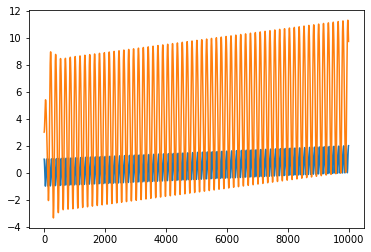

In [36]:
input_vect=np.expand_dims(inputs[:,3],axis=1)
output_vect=np.expand_dims(inputs[:,4],axis=1)
print(input_vect)
print(input_vect.shape)
print(output_vect)
plt.plot(input_vect)
plt.plot(output_vect)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

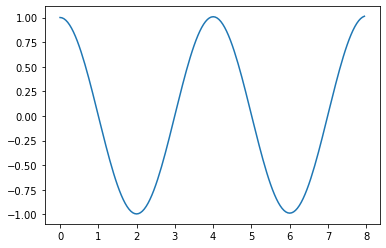

In [4]:
input1=np.expand_dims(inputs[:,0],axis=1)
input2=np.expand_dims(inputs[:,1],axis=1)
input3=np.expand_dims(inputs[:,2],axis=1)
input4=np.expand_dims(inputs[:,3],axis=1)
input5=np.expand_dims(inputs[:,4],axis=1)

plt.plot(input1[:160,:],input4[:160,:])
plt.show

In [5]:
time_inputs=2
train_size=np.int(np.round(input_vect.shape[0]*0.8))
print(train_size)

train_input_all=input_vect[:train_size,:]
test_input_all=input_vect[train_size:,:]

train_output_all=output_vect[:train_size,:]
test_output_all=output_vect[train_size:,:]

8000


/var/folders/qf/wpzcwshx6z1g26pymvwwnxdr0000gn/T/ipykernel_34834/4080768470.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  train_size=np.int(np.round(input_vect.shape[0]*0.8))


In [6]:
ci=np.mean(train_input_all,0)
cmaxi=np.max(train_input_all,0)
print(cmaxi)
cmini=np.min(train_input_all,0)
print(cmini)
cdenoi=cmaxi-cmini
train_input_all_n=(train_input_all-ci)/cdenoi
test_input_all_n=(test_input_all-ci)/cdenoi

c=np.mean(train_output_all,0)
cmax=np.max(train_output_all,0)
cmin=np.min(train_output_all,0)
cdeno=cmax-cmin
train_output_all_n=(train_output_all-c)/cdeno
test_output_all_n=(test_output_all-c)/cdeno

print(c)
print(cdeno)
print(test_input_all_n.shape)
print(test_output_all_n.shape)

[1.7998567]
[-0.9959996]
[4.18350321]
[14.0010635]
(2000, 1)
(2000, 1)


In [7]:
index=0
inputs_seq=np.zeros((train_input_all_n.shape[0]-time_inputs-1,time_inputs,train_input_all_n.shape[1]+train_output_all_n.shape[1]))
outputs_seq=np.zeros((train_output_all_n.shape[0]-time_inputs-1,train_output_all_n.shape[1]))
outputs_seq_long=np.zeros((train_input_all_n.shape[0]-time_inputs-1,time_inputs,train_output_all_n.shape[1]))

for j in range(train_output_all_n.shape[0]-time_inputs-1):
    inputs_seq[np.int(index),:,:]=np.concatenate((train_input_all_n[j+1:j+time_inputs+1,:],train_output_all_n[j:j+time_inputs,:]),axis=1)
    outputs_seq[np.int(index),:]=train_output_all_n[j+time_inputs,:]
    outputs_seq_long[np.int(index),:,:]=train_output_all_n[j+1:j+time_inputs+1,:]
    index=index+1

print(inputs_seq.shape)
print(outputs_seq.shape)
print(outputs_seq_long.shape)


index=0
inputs_seq_t=np.zeros((test_input_all_n.shape[0]-time_inputs-1,time_inputs,test_input_all_n.shape[1]+test_output_all_n.shape[1]))
outputs_seq_t=np.zeros((test_output_all_n.shape[0]-time_inputs-1,test_output_all_n.shape[1]))
outputs_seq_long_t=np.zeros((test_output_all_n.shape[0]-time_inputs-1,time_inputs,test_output_all_n.shape[1]))

for j in range(test_output_all_n.shape[0]-time_inputs-1):
    inputs_seq_t[np.int(index),:,:]=np.concatenate((test_input_all_n[j+1:j+time_inputs+1,:],test_output_all_n[j:j+time_inputs,:]),axis=1)
    outputs_seq_t[np.int(index),:]=test_output_all_n[j+time_inputs,:]
    outputs_seq_long_t[np.int(index),:,:]=train_output_all_n[j+1:j+time_inputs+1,:]
    index=index+1

print(inputs_seq_t.shape)
print(outputs_seq_t.shape)
print(outputs_seq_long_t.shape)



/var/folders/qf/wpzcwshx6z1g26pymvwwnxdr0000gn/T/ipykernel_34834/3971321054.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  inputs_seq[np.int(index),:,:]=np.concatenate((train_input_all_n[j+1:j+time_inputs+1,:],train_output_all_n[j:j+time_inputs,:]),axis=1)
/var/folders/qf/wpzcwshx6z1g26pymvwwnxdr0000gn/T/ipykernel_34834/3971321054.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wi

(7997, 2, 2)
(7997, 1)
(7997, 2, 1)
(1997, 2, 2)
(1997, 1)
(1997, 2, 1)


/var/folders/qf/wpzcwshx6z1g26pymvwwnxdr0000gn/T/ipykernel_34834/3971321054.py:26: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  inputs_seq_t[np.int(index),:,:]=np.concatenate((test_input_all_n[j+1:j+time_inputs+1,:],test_output_all_n[j:j+time_inputs,:]),axis=1)
/var/folders/qf/wpzcwshx6z1g26pymvwwnxdr0000gn/T/ipykernel_34834/3971321054.py:27: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may 

In [9]:
train_images=inputs_seq
test_images=inputs_seq_t
print(test_images.shape)
print(train_images.shape)

(1997, 2, 2)
(7997, 2, 2)


In [10]:
 def lstm_model(train_in,train_out,test_in,test_out,time_inputs):
    from keras.models import Sequential
    from keras.layers import Dense
    
    #for y in outputs.T:
    model = Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=(time_inputs,train_images.shape[2])))
    #model.add(tf.keras.layers.Reshape((20,5), input_shape=(20,5,1)))
    #model.add(tf.keras.layers.LSTM(4, return_sequences=False,dropout=0.1, recurrent_dropout=0.1))
    #model.add(tf.keras.layers.Reshape((20,5,1), input_shape=(20,5)))
    model.add(tf.keras.layers.LSTM(1, return_sequences=False))
    model.add(tf.keras.layers.Flatten())
    model.add(Dense(1, activation='linear'))
    print(model.summary())
    model.compile(optimizer='adam', loss='mse',metrics=[tf.keras.metrics.mean_absolute_error,tf.keras.metrics.mean_absolute_percentage_error])
    model.fit(train_in, train_out,epochs=1500,batch_size=100,shuffle=True,validation_data=(test_in, test_out))

    return model

In [11]:
print(time_inputs)
model=lstm_model(train_images,outputs_seq,test_images,outputs_seq_t,time_inputs)

2


2022-07-27 08:30:35.797912: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1)                 16        
                                                                 
 flatten (Flatten)           (None, 1)                 0         
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 18
Trainable params: 18
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1500
80/80 [==============================] - 8s 27ms/step - loss: 0.1634 - mean_absolute_error: 0.3552 - mean_absolute_percentage_error: 186.2675 - val_loss: 0.1908 - val_mean_absolute_error: 0.3760 - val_mean_absolute_percentage_error: 224.3235
Epoch 2/1500
80/80 [==============================] - 1s 10ms/st

Epoch 30/1500
80/80 [==============================] - 1s 6ms/step - loss: 5.5566e-04 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 30.3679 - val_loss: 4.0974e-04 - val_mean_absolute_error: 0.0131 - val_mean_absolute_percentage_error: 58.6703
Epoch 31/1500
80/80 [==============================] - 0s 6ms/step - loss: 5.3295e-04 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 30.2762 - val_loss: 3.8751e-04 - val_mean_absolute_error: 0.0129 - val_mean_absolute_percentage_error: 57.3395
Epoch 32/1500
80/80 [==============================] - 0s 6ms/step - loss: 5.1089e-04 - mean_absolute_error: 0.0165 - mean_absolute_percentage_error: 30.1229 - val_loss: 3.8681e-04 - val_mean_absolute_error: 0.0134 - val_mean_absolute_percentage_error: 56.9167
Epoch 33/1500
80/80 [==============================] - 1s 8ms/step - loss: 4.9037e-04 - mean_absolute_error: 0.0162 - mean_absolute_percentage_error: 30.1435 - val_loss: 3.8041e-04 - val_mean_absolute_error: 0.0136 - 

80/80 [==============================] - 1s 7ms/step - loss: 2.4065e-04 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 31.5371 - val_loss: 4.3062e-04 - val_mean_absolute_error: 0.0170 - val_mean_absolute_percentage_error: 37.6655
Epoch 62/1500
80/80 [==============================] - 0s 6ms/step - loss: 2.3917e-04 - mean_absolute_error: 0.0126 - mean_absolute_percentage_error: 31.4806 - val_loss: 4.2462e-04 - val_mean_absolute_error: 0.0169 - val_mean_absolute_percentage_error: 36.8409
Epoch 63/1500
80/80 [==============================] - 0s 6ms/step - loss: 2.3760e-04 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 31.4982 - val_loss: 4.0084e-04 - val_mean_absolute_error: 0.0164 - val_mean_absolute_percentage_error: 35.4011
Epoch 64/1500
80/80 [==============================] - 0s 6ms/step - loss: 2.3681e-04 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 31.6117 - val_loss: 4.6241e-04 - val_mean_absolute_error: 0.0176 - val_mean_absol

80/80 [==============================] - 1s 6ms/step - loss: 2.0057e-04 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 30.4091 - val_loss: 3.9370e-04 - val_mean_absolute_error: 0.0164 - val_mean_absolute_percentage_error: 35.5480
Epoch 93/1500
80/80 [==============================] - 1s 7ms/step - loss: 1.9862e-04 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 30.1923 - val_loss: 3.7791e-04 - val_mean_absolute_error: 0.0161 - val_mean_absolute_percentage_error: 35.5784
Epoch 94/1500
80/80 [==============================] - 1s 6ms/step - loss: 1.9784e-04 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 30.3425 - val_loss: 3.5577e-04 - val_mean_absolute_error: 0.0157 - val_mean_absolute_percentage_error: 34.2985
Epoch 95/1500
80/80 [==============================] - 1s 7ms/step - loss: 1.9682e-04 - mean_absolute_error: 0.0114 - mean_absolute_percentage_error: 30.1458 - val_loss: 3.4741e-04 - val_mean_absolute_error: 0.0155 - val_mean_absol

80/80 [==============================] - 1s 7ms/step - loss: 1.6552e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 28.5374 - val_loss: 3.1678e-04 - val_mean_absolute_error: 0.0151 - val_mean_absolute_percentage_error: 35.4005
Epoch 124/1500
80/80 [==============================] - 1s 7ms/step - loss: 1.6436e-04 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 28.1855 - val_loss: 2.6311e-04 - val_mean_absolute_error: 0.0139 - val_mean_absolute_percentage_error: 32.9615
Epoch 125/1500
80/80 [==============================] - 1s 8ms/step - loss: 1.6360e-04 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 28.3349 - val_loss: 2.8618e-04 - val_mean_absolute_error: 0.0145 - val_mean_absolute_percentage_error: 33.6177
Epoch 126/1500
80/80 [==============================] - 0s 6ms/step - loss: 1.6246e-04 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 28.4498 - val_loss: 2.7271e-04 - val_mean_absolute_error: 0.0142 - val_mean_ab

80/80 [==============================] - 1s 7ms/step - loss: 1.4225e-04 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 27.0527 - val_loss: 2.6577e-04 - val_mean_absolute_error: 0.0142 - val_mean_absolute_percentage_error: 34.8117
Epoch 155/1500
80/80 [==============================] - 0s 6ms/step - loss: 1.4154e-04 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 27.0256 - val_loss: 2.5243e-04 - val_mean_absolute_error: 0.0139 - val_mean_absolute_percentage_error: 33.5340
Epoch 156/1500
80/80 [==============================] - 1s 7ms/step - loss: 1.4219e-04 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 26.9093 - val_loss: 2.2705e-04 - val_mean_absolute_error: 0.0132 - val_mean_absolute_percentage_error: 32.5342
Epoch 157/1500
80/80 [==============================] - 1s 7ms/step - loss: 1.4059e-04 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 26.9815 - val_loss: 2.3590e-04 - val_mean_absolute_error: 0.0135 - val_mean_ab

80/80 [==============================] - 1s 7ms/step - loss: 1.2520e-04 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 25.6862 - val_loss: 1.9747e-04 - val_mean_absolute_error: 0.0124 - val_mean_absolute_percentage_error: 31.3559
Epoch 186/1500
80/80 [==============================] - 1s 7ms/step - loss: 1.2546e-04 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 25.7369 - val_loss: 2.1033e-04 - val_mean_absolute_error: 0.0127 - val_mean_absolute_percentage_error: 32.6093
Epoch 187/1500
80/80 [==============================] - 1s 7ms/step - loss: 1.2496e-04 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 25.6713 - val_loss: 1.9177e-04 - val_mean_absolute_error: 0.0123 - val_mean_absolute_percentage_error: 30.4380
Epoch 188/1500
80/80 [==============================] - 1s 7ms/step - loss: 1.2411e-04 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 25.6150 - val_loss: 2.0739e-04 - val_mean_absolute_error: 0.0127 - val_mean_ab

80/80 [==============================] - 1s 7ms/step - loss: 1.1140e-04 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 24.3513 - val_loss: 1.7839e-04 - val_mean_absolute_error: 0.0118 - val_mean_absolute_percentage_error: 31.3254
Epoch 217/1500
80/80 [==============================] - 0s 6ms/step - loss: 1.1063e-04 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 24.0857 - val_loss: 1.8592e-04 - val_mean_absolute_error: 0.0122 - val_mean_absolute_percentage_error: 30.6706
Epoch 218/1500
80/80 [==============================] - 1s 7ms/step - loss: 1.0988e-04 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 24.1627 - val_loss: 1.7917e-04 - val_mean_absolute_error: 0.0119 - val_mean_absolute_percentage_error: 30.8772
Epoch 219/1500
80/80 [==============================] - 1s 8ms/step - loss: 1.0958e-04 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 24.4479 - val_loss: 1.7435e-04 - val_mean_absolute_error: 0.0118 - val_mean_ab

80/80 [==============================] - 0s 6ms/step - loss: 9.6012e-05 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 23.0252 - val_loss: 1.4983e-04 - val_mean_absolute_error: 0.0111 - val_mean_absolute_percentage_error: 29.3034
Epoch 248/1500
80/80 [==============================] - 1s 7ms/step - loss: 9.5564e-05 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 23.0887 - val_loss: 1.7510e-04 - val_mean_absolute_error: 0.0117 - val_mean_absolute_percentage_error: 30.3824
Epoch 249/1500
80/80 [==============================] - 0s 6ms/step - loss: 9.5372e-05 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 22.9804 - val_loss: 1.4228e-04 - val_mean_absolute_error: 0.0107 - val_mean_absolute_percentage_error: 29.1994
Epoch 250/1500
80/80 [==============================] - 0s 6ms/step - loss: 9.5097e-05 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 22.6199 - val_loss: 1.5208e-04 - val_mean_absolute_error: 0.0110 - val_mean_ab

80/80 [==============================] - 1s 7ms/step - loss: 8.2002e-05 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 21.4567 - val_loss: 1.1479e-04 - val_mean_absolute_error: 0.0098 - val_mean_absolute_percentage_error: 26.6094
Epoch 279/1500
80/80 [==============================] - 1s 8ms/step - loss: 8.1319e-05 - mean_absolute_error: 0.0074 - mean_absolute_percentage_error: 21.6654 - val_loss: 1.1360e-04 - val_mean_absolute_error: 0.0097 - val_mean_absolute_percentage_error: 26.8610
Epoch 280/1500
80/80 [==============================] - 1s 7ms/step - loss: 8.0996e-05 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 21.1010 - val_loss: 1.1753e-04 - val_mean_absolute_error: 0.0099 - val_mean_absolute_percentage_error: 27.1358
Epoch 281/1500
80/80 [==============================] - 1s 6ms/step - loss: 8.0101e-05 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 21.3787 - val_loss: 1.2711e-04 - val_mean_absolute_error: 0.0103 - val_mean_ab

80/80 [==============================] - 1s 7ms/step - loss: 6.7421e-05 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 19.6463 - val_loss: 9.7929e-05 - val_mean_absolute_error: 0.0090 - val_mean_absolute_percentage_error: 26.4142
Epoch 310/1500
80/80 [==============================] - 1s 7ms/step - loss: 6.7118e-05 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 19.7293 - val_loss: 9.6235e-05 - val_mean_absolute_error: 0.0090 - val_mean_absolute_percentage_error: 25.6368
Epoch 311/1500
80/80 [==============================] - 1s 7ms/step - loss: 6.6215e-05 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 19.6105 - val_loss: 9.2726e-05 - val_mean_absolute_error: 0.0088 - val_mean_absolute_percentage_error: 25.6441
Epoch 312/1500
80/80 [==============================] - 1s 6ms/step - loss: 6.6074e-05 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 19.5218 - val_loss: 9.3201e-05 - val_mean_absolute_error: 0.0088 - val_mean_ab

80/80 [==============================] - 0s 6ms/step - loss: 5.3252e-05 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 17.5461 - val_loss: 6.8300e-05 - val_mean_absolute_error: 0.0074 - val_mean_absolute_percentage_error: 23.2798
Epoch 341/1500
80/80 [==============================] - 0s 6ms/step - loss: 5.2900e-05 - mean_absolute_error: 0.0059 - mean_absolute_percentage_error: 17.4946 - val_loss: 7.1189e-05 - val_mean_absolute_error: 0.0076 - val_mean_absolute_percentage_error: 23.6312
Epoch 342/1500
80/80 [==============================] - 0s 6ms/step - loss: 5.2317e-05 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 17.5059 - val_loss: 7.3220e-05 - val_mean_absolute_error: 0.0077 - val_mean_absolute_percentage_error: 24.0265
Epoch 343/1500
80/80 [==============================] - 1s 7ms/step - loss: 5.2774e-05 - mean_absolute_error: 0.0058 - mean_absolute_percentage_error: 17.4910 - val_loss: 7.0572e-05 - val_mean_absolute_error: 0.0076 - val_mean_ab

80/80 [==============================] - 0s 5ms/step - loss: 4.2557e-05 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 15.4459 - val_loss: 5.3987e-05 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 20.8191
Epoch 372/1500
80/80 [==============================] - 0s 6ms/step - loss: 4.2976e-05 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 15.4635 - val_loss: 5.5014e-05 - val_mean_absolute_error: 0.0063 - val_mean_absolute_percentage_error: 21.0269
Epoch 373/1500
80/80 [==============================] - 1s 6ms/step - loss: 4.1902e-05 - mean_absolute_error: 0.0052 - mean_absolute_percentage_error: 15.5624 - val_loss: 5.3238e-05 - val_mean_absolute_error: 0.0061 - val_mean_absolute_percentage_error: 20.9834
Epoch 374/1500
80/80 [==============================] - 1s 6ms/step - loss: 4.1132e-05 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 15.2936 - val_loss: 5.3084e-05 - val_mean_absolute_error: 0.0061 - val_mean_ab

80/80 [==============================] - 0s 6ms/step - loss: 3.4711e-05 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 13.9835 - val_loss: 4.7121e-05 - val_mean_absolute_error: 0.0058 - val_mean_absolute_percentage_error: 19.0775
Epoch 403/1500
80/80 [==============================] - 0s 6ms/step - loss: 3.4245e-05 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 13.8043 - val_loss: 4.7614e-05 - val_mean_absolute_error: 0.0059 - val_mean_absolute_percentage_error: 18.3437
Epoch 404/1500
80/80 [==============================] - 0s 6ms/step - loss: 3.4151e-05 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 13.8386 - val_loss: 4.5618e-05 - val_mean_absolute_error: 0.0058 - val_mean_absolute_percentage_error: 18.2171
Epoch 405/1500
80/80 [==============================] - 0s 6ms/step - loss: 3.3907e-05 - mean_absolute_error: 0.0047 - mean_absolute_percentage_error: 13.6959 - val_loss: 4.6657e-05 - val_mean_absolute_error: 0.0058 - val_mean_ab

80/80 [==============================] - 1s 7ms/step - loss: 2.9076e-05 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 12.6360 - val_loss: 3.9926e-05 - val_mean_absolute_error: 0.0055 - val_mean_absolute_percentage_error: 15.7435
Epoch 434/1500
80/80 [==============================] - 1s 7ms/step - loss: 2.8824e-05 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 12.4675 - val_loss: 4.2283e-05 - val_mean_absolute_error: 0.0057 - val_mean_absolute_percentage_error: 15.5452
Epoch 435/1500
80/80 [==============================] - 1s 7ms/step - loss: 2.8407e-05 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 12.6117 - val_loss: 3.9741e-05 - val_mean_absolute_error: 0.0056 - val_mean_absolute_percentage_error: 15.0164
Epoch 436/1500
80/80 [==============================] - 1s 8ms/step - loss: 2.8605e-05 - mean_absolute_error: 0.0044 - mean_absolute_percentage_error: 12.4468 - val_loss: 4.1437e-05 - val_mean_absolute_error: 0.0057 - val_mean_ab

80/80 [==============================] - 1s 6ms/step - loss: 2.4255e-05 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 11.6242 - val_loss: 3.5176e-05 - val_mean_absolute_error: 0.0053 - val_mean_absolute_percentage_error: 13.0219
Epoch 465/1500
80/80 [==============================] - 1s 7ms/step - loss: 2.4435e-05 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 11.7180 - val_loss: 3.3899e-05 - val_mean_absolute_error: 0.0052 - val_mean_absolute_percentage_error: 13.3472
Epoch 466/1500
80/80 [==============================] - 1s 7ms/step - loss: 2.4107e-05 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 11.5396 - val_loss: 3.3037e-05 - val_mean_absolute_error: 0.0051 - val_mean_absolute_percentage_error: 12.9527
Epoch 467/1500
80/80 [==============================] - 1s 8ms/step - loss: 2.4025e-05 - mean_absolute_error: 0.0040 - mean_absolute_percentage_error: 11.5669 - val_loss: 3.4584e-05 - val_mean_absolute_error: 0.0053 - val_mean_ab

80/80 [==============================] - 1s 6ms/step - loss: 2.0350e-05 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 10.7370 - val_loss: 3.0743e-05 - val_mean_absolute_error: 0.0050 - val_mean_absolute_percentage_error: 11.1306
Epoch 496/1500
80/80 [==============================] - 1s 7ms/step - loss: 2.0272e-05 - mean_absolute_error: 0.0037 - mean_absolute_percentage_error: 10.4681 - val_loss: 3.1282e-05 - val_mean_absolute_error: 0.0049 - val_mean_absolute_percentage_error: 11.5539
Epoch 497/1500
80/80 [==============================] - 1s 7ms/step - loss: 2.0132e-05 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 10.7082 - val_loss: 3.2048e-05 - val_mean_absolute_error: 0.0051 - val_mean_absolute_percentage_error: 10.6085
Epoch 498/1500
80/80 [==============================] - 1s 6ms/step - loss: 2.0048e-05 - mean_absolute_error: 0.0036 - mean_absolute_percentage_error: 10.6148 - val_loss: 2.9577e-05 - val_mean_absolute_error: 0.0049 - val_mean_ab

80/80 [==============================] - 1s 8ms/step - loss: 1.7004e-05 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 9.6655 - val_loss: 2.5817e-05 - val_mean_absolute_error: 0.0046 - val_mean_absolute_percentage_error: 9.3318
Epoch 527/1500
80/80 [==============================] - 1s 8ms/step - loss: 1.7001e-05 - mean_absolute_error: 0.0034 - mean_absolute_percentage_error: 9.6682 - val_loss: 2.4802e-05 - val_mean_absolute_error: 0.0045 - val_mean_absolute_percentage_error: 9.3917
Epoch 528/1500
80/80 [==============================] - 1s 9ms/step - loss: 1.6783e-05 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 9.5183 - val_loss: 2.4972e-05 - val_mean_absolute_error: 0.0045 - val_mean_absolute_percentage_error: 9.4775
Epoch 529/1500
80/80 [==============================] - 1s 9ms/step - loss: 1.6722e-05 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 9.5475 - val_loss: 2.4420e-05 - val_mean_absolute_error: 0.0045 - val_mean_absolute_

80/80 [==============================] - 1s 7ms/step - loss: 1.4293e-05 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 8.6924 - val_loss: 2.3852e-05 - val_mean_absolute_error: 0.0044 - val_mean_absolute_percentage_error: 7.5704
Epoch 558/1500
80/80 [==============================] - 1s 8ms/step - loss: 1.4019e-05 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 8.7252 - val_loss: 2.1788e-05 - val_mean_absolute_error: 0.0042 - val_mean_absolute_percentage_error: 8.1911
Epoch 559/1500
80/80 [==============================] - 1s 7ms/step - loss: 1.4045e-05 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 8.5588 - val_loss: 2.5081e-05 - val_mean_absolute_error: 0.0045 - val_mean_absolute_percentage_error: 7.4418
Epoch 560/1500
80/80 [==============================] - 1s 7ms/step - loss: 1.3970e-05 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 8.6232 - val_loss: 2.1569e-05 - val_mean_absolute_error: 0.0042 - val_mean_absolute_

80/80 [==============================] - 0s 6ms/step - loss: 1.1172e-05 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 7.5737 - val_loss: 2.3093e-05 - val_mean_absolute_error: 0.0043 - val_mean_absolute_percentage_error: 6.0859
Epoch 589/1500
80/80 [==============================] - 1s 6ms/step - loss: 1.1190e-05 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 7.7859 - val_loss: 1.8452e-05 - val_mean_absolute_error: 0.0039 - val_mean_absolute_percentage_error: 6.4826
Epoch 590/1500
80/80 [==============================] - 1s 6ms/step - loss: 1.1095e-05 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 7.4788 - val_loss: 1.9058e-05 - val_mean_absolute_error: 0.0039 - val_mean_absolute_percentage_error: 6.3973
Epoch 591/1500
80/80 [==============================] - 1s 7ms/step - loss: 1.0979e-05 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 7.5982 - val_loss: 2.0188e-05 - val_mean_absolute_error: 0.0041 - val_mean_absolute_

80/80 [==============================] - 1s 7ms/step - loss: 8.1073e-06 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 6.3263 - val_loss: 1.3224e-05 - val_mean_absolute_error: 0.0032 - val_mean_absolute_percentage_error: 5.4781
Epoch 620/1500
80/80 [==============================] - 1s 6ms/step - loss: 8.0967e-06 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 6.4011 - val_loss: 1.3159e-05 - val_mean_absolute_error: 0.0032 - val_mean_absolute_percentage_error: 5.5596
Epoch 621/1500
80/80 [==============================] - 1s 7ms/step - loss: 7.9566e-06 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 6.2923 - val_loss: 1.3801e-05 - val_mean_absolute_error: 0.0033 - val_mean_absolute_percentage_error: 5.5570
Epoch 622/1500
80/80 [==============================] - 1s 7ms/step - loss: 7.8485e-06 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 6.2536 - val_loss: 1.2322e-05 - val_mean_absolute_error: 0.0031 - val_mean_absolute_

80/80 [==============================] - 1s 7ms/step - loss: 4.6820e-06 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 4.6827 - val_loss: 9.0260e-06 - val_mean_absolute_error: 0.0027 - val_mean_absolute_percentage_error: 4.2252
Epoch 651/1500
80/80 [==============================] - 0s 6ms/step - loss: 4.5336e-06 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 4.5366 - val_loss: 8.2944e-06 - val_mean_absolute_error: 0.0025 - val_mean_absolute_percentage_error: 4.5443
Epoch 652/1500
80/80 [==============================] - 1s 8ms/step - loss: 4.5768e-06 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 4.4351 - val_loss: 7.7027e-06 - val_mean_absolute_error: 0.0024 - val_mean_absolute_percentage_error: 4.5304
Epoch 653/1500
80/80 [==============================] - 1s 7ms/step - loss: 4.4617e-06 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 4.2847 - val_loss: 9.1103e-06 - val_mean_absolute_error: 0.0027 - val_mean_absolute_

80/80 [==============================] - 1s 8ms/step - loss: 1.7310e-06 - mean_absolute_error: 0.0011 - mean_absolute_percentage_error: 2.4699 - val_loss: 4.2391e-06 - val_mean_absolute_error: 0.0017 - val_mean_absolute_percentage_error: 3.4963
Epoch 682/1500
80/80 [==============================] - 1s 7ms/step - loss: 1.6952e-06 - mean_absolute_error: 0.0011 - mean_absolute_percentage_error: 2.3300 - val_loss: 3.8362e-06 - val_mean_absolute_error: 0.0017 - val_mean_absolute_percentage_error: 3.4132
Epoch 683/1500
80/80 [==============================] - 1s 7ms/step - loss: 1.6654e-06 - mean_absolute_error: 0.0010 - mean_absolute_percentage_error: 2.2992 - val_loss: 4.0761e-06 - val_mean_absolute_error: 0.0017 - val_mean_absolute_percentage_error: 3.3074
Epoch 684/1500
80/80 [==============================] - 1s 7ms/step - loss: 1.5235e-06 - mean_absolute_error: 0.0010 - mean_absolute_percentage_error: 2.1950 - val_loss: 3.6804e-06 - val_mean_absolute_error: 0.0016 - val_mean_absolute_

80/80 [==============================] - 1s 7ms/step - loss: 8.3416e-07 - mean_absolute_error: 6.9752e-04 - mean_absolute_percentage_error: 1.0708 - val_loss: 2.4487e-06 - val_mean_absolute_error: 0.0012 - val_mean_absolute_percentage_error: 2.9681
Epoch 713/1500
80/80 [==============================] - 1s 6ms/step - loss: 8.2329e-07 - mean_absolute_error: 6.9230e-04 - mean_absolute_percentage_error: 1.0713 - val_loss: 2.2180e-06 - val_mean_absolute_error: 0.0012 - val_mean_absolute_percentage_error: 2.9466
Epoch 714/1500
80/80 [==============================] - 1s 6ms/step - loss: 7.6474e-07 - mean_absolute_error: 6.6061e-04 - mean_absolute_percentage_error: 0.9810 - val_loss: 2.5778e-06 - val_mean_absolute_error: 0.0013 - val_mean_absolute_percentage_error: 2.6894
Epoch 715/1500
80/80 [==============================] - 1s 8ms/step - loss: 7.5818e-07 - mean_absolute_error: 6.6018e-04 - mean_absolute_percentage_error: 0.9416 - val_loss: 2.3800e-06 - val_mean_absolute_error: 0.0012 - va

80/80 [==============================] - 1s 6ms/step - loss: 6.0082e-07 - mean_absolute_error: 5.7549e-04 - mean_absolute_percentage_error: 0.7287 - val_loss: 1.9124e-06 - val_mean_absolute_error: 0.0011 - val_mean_absolute_percentage_error: 2.1134
Epoch 744/1500
80/80 [==============================] - 1s 7ms/step - loss: 6.0410e-07 - mean_absolute_error: 5.8004e-04 - mean_absolute_percentage_error: 0.7613 - val_loss: 2.0493e-06 - val_mean_absolute_error: 0.0011 - val_mean_absolute_percentage_error: 2.2977
Epoch 745/1500
80/80 [==============================] - 0s 6ms/step - loss: 5.9064e-07 - mean_absolute_error: 5.7163e-04 - mean_absolute_percentage_error: 0.7498 - val_loss: 2.0678e-06 - val_mean_absolute_error: 0.0011 - val_mean_absolute_percentage_error: 2.5658
Epoch 746/1500
80/80 [==============================] - 0s 6ms/step - loss: 6.0825e-07 - mean_absolute_error: 5.8213e-04 - mean_absolute_percentage_error: 0.7741 - val_loss: 2.0380e-06 - val_mean_absolute_error: 0.0011 - va

80/80 [==============================] - 0s 6ms/step - loss: 5.6532e-07 - mean_absolute_error: 5.6109e-04 - mean_absolute_percentage_error: 0.7739 - val_loss: 1.6710e-06 - val_mean_absolute_error: 9.9493e-04 - val_mean_absolute_percentage_error: 1.8994
Epoch 775/1500
80/80 [==============================] - 0s 6ms/step - loss: 5.5796e-07 - mean_absolute_error: 5.5847e-04 - mean_absolute_percentage_error: 0.7907 - val_loss: 1.7166e-06 - val_mean_absolute_error: 9.9559e-04 - val_mean_absolute_percentage_error: 1.9905
Epoch 776/1500
80/80 [==============================] - 0s 6ms/step - loss: 5.6382e-07 - mean_absolute_error: 5.6014e-04 - mean_absolute_percentage_error: 0.8004 - val_loss: 1.8376e-06 - val_mean_absolute_error: 0.0010 - val_mean_absolute_percentage_error: 2.2080
Epoch 777/1500
80/80 [==============================] - 0s 5ms/step - loss: 5.5512e-07 - mean_absolute_error: 5.5453e-04 - mean_absolute_percentage_error: 0.7850 - val_loss: 1.7238e-06 - val_mean_absolute_error: 0.0

Epoch 805/1500
80/80 [==============================] - 1s 6ms/step - loss: 5.3156e-07 - mean_absolute_error: 5.4494e-04 - mean_absolute_percentage_error: 0.7280 - val_loss: 1.5577e-06 - val_mean_absolute_error: 9.4724e-04 - val_mean_absolute_percentage_error: 1.7933
Epoch 806/1500
80/80 [==============================] - 1s 8ms/step - loss: 5.7285e-07 - mean_absolute_error: 5.7177e-04 - mean_absolute_percentage_error: 0.7710 - val_loss: 1.5386e-06 - val_mean_absolute_error: 9.4408e-04 - val_mean_absolute_percentage_error: 1.7853
Epoch 807/1500
80/80 [==============================] - 1s 7ms/step - loss: 5.2383e-07 - mean_absolute_error: 5.4160e-04 - mean_absolute_percentage_error: 0.7024 - val_loss: 2.0126e-06 - val_mean_absolute_error: 0.0010 - val_mean_absolute_percentage_error: 2.3340
Epoch 808/1500
80/80 [==============================] - 1s 7ms/step - loss: 5.2840e-07 - mean_absolute_error: 5.4310e-04 - mean_absolute_percentage_error: 0.7393 - val_loss: 1.9781e-06 - val_mean_abso

Epoch 836/1500
80/80 [==============================] - 1s 8ms/step - loss: 5.3406e-07 - mean_absolute_error: 5.5245e-04 - mean_absolute_percentage_error: 0.7386 - val_loss: 1.4898e-06 - val_mean_absolute_error: 9.3819e-04 - val_mean_absolute_percentage_error: 1.3459
Epoch 837/1500
80/80 [==============================] - 1s 7ms/step - loss: 5.1071e-07 - mean_absolute_error: 5.3617e-04 - mean_absolute_percentage_error: 0.7341 - val_loss: 1.7231e-06 - val_mean_absolute_error: 9.6952e-04 - val_mean_absolute_percentage_error: 1.8713
Epoch 838/1500
80/80 [==============================] - 1s 7ms/step - loss: 5.0707e-07 - mean_absolute_error: 5.3340e-04 - mean_absolute_percentage_error: 0.7481 - val_loss: 1.4958e-06 - val_mean_absolute_error: 9.2696e-04 - val_mean_absolute_percentage_error: 1.5443
Epoch 839/1500
80/80 [==============================] - 1s 8ms/step - loss: 5.6018e-07 - mean_absolute_error: 5.6818e-04 - mean_absolute_percentage_error: 0.7677 - val_loss: 1.7403e-06 - val_mean_

Epoch 867/1500
80/80 [==============================] - 1s 7ms/step - loss: 4.9841e-07 - mean_absolute_error: 5.3004e-04 - mean_absolute_percentage_error: 0.7707 - val_loss: 1.5409e-06 - val_mean_absolute_error: 9.1567e-04 - val_mean_absolute_percentage_error: 1.3857
Epoch 868/1500
80/80 [==============================] - 1s 7ms/step - loss: 5.2205e-07 - mean_absolute_error: 5.4523e-04 - mean_absolute_percentage_error: 0.7693 - val_loss: 1.5111e-06 - val_mean_absolute_error: 9.1340e-04 - val_mean_absolute_percentage_error: 1.4579
Epoch 869/1500
80/80 [==============================] - 1s 6ms/step - loss: 5.0496e-07 - mean_absolute_error: 5.3302e-04 - mean_absolute_percentage_error: 0.7857 - val_loss: 1.4688e-06 - val_mean_absolute_error: 9.0479e-04 - val_mean_absolute_percentage_error: 1.3876
Epoch 870/1500
80/80 [==============================] - 0s 6ms/step - loss: 5.1377e-07 - mean_absolute_error: 5.3922e-04 - mean_absolute_percentage_error: 0.8087 - val_loss: 1.5301e-06 - val_mean_

80/80 [==============================] - 0s 5ms/step - loss: 4.8578e-07 - mean_absolute_error: 5.2208e-04 - mean_absolute_percentage_error: 0.7695 - val_loss: 2.0108e-06 - val_mean_absolute_error: 0.0010 - val_mean_absolute_percentage_error: 2.0493
Epoch 898/1500
80/80 [==============================] - 0s 6ms/step - loss: 4.8875e-07 - mean_absolute_error: 5.2312e-04 - mean_absolute_percentage_error: 0.7372 - val_loss: 1.4941e-06 - val_mean_absolute_error: 8.9532e-04 - val_mean_absolute_percentage_error: 1.4811
Epoch 899/1500
80/80 [==============================] - 0s 6ms/step - loss: 4.7908e-07 - mean_absolute_error: 5.1867e-04 - mean_absolute_percentage_error: 0.7146 - val_loss: 1.6844e-06 - val_mean_absolute_error: 9.2842e-04 - val_mean_absolute_percentage_error: 1.6477
Epoch 900/1500
80/80 [==============================] - 0s 6ms/step - loss: 4.7897e-07 - mean_absolute_error: 5.1898e-04 - mean_absolute_percentage_error: 0.7684 - val_loss: 1.5203e-06 - val_mean_absolute_error: 9.0

Epoch 928/1500
80/80 [==============================] - 0s 6ms/step - loss: 4.8783e-07 - mean_absolute_error: 5.2479e-04 - mean_absolute_percentage_error: 0.7232 - val_loss: 1.5551e-06 - val_mean_absolute_error: 8.9723e-04 - val_mean_absolute_percentage_error: 1.4175
Epoch 929/1500
80/80 [==============================] - 0s 6ms/step - loss: 4.8420e-07 - mean_absolute_error: 5.2099e-04 - mean_absolute_percentage_error: 0.7873 - val_loss: 1.5316e-06 - val_mean_absolute_error: 8.9878e-04 - val_mean_absolute_percentage_error: 1.4147
Epoch 930/1500
80/80 [==============================] - 0s 6ms/step - loss: 4.9234e-07 - mean_absolute_error: 5.2534e-04 - mean_absolute_percentage_error: 0.7650 - val_loss: 1.4582e-06 - val_mean_absolute_error: 8.8952e-04 - val_mean_absolute_percentage_error: 1.5190
Epoch 931/1500
80/80 [==============================] - 0s 6ms/step - loss: 4.9173e-07 - mean_absolute_error: 5.3013e-04 - mean_absolute_percentage_error: 0.7983 - val_loss: 1.4785e-06 - val_mean_

80/80 [==============================] - 1s 7ms/step - loss: 4.8407e-07 - mean_absolute_error: 5.2268e-04 - mean_absolute_percentage_error: 0.7355 - val_loss: 1.5448e-06 - val_mean_absolute_error: 8.9391e-04 - val_mean_absolute_percentage_error: 1.3036
Epoch 959/1500
80/80 [==============================] - 0s 6ms/step - loss: 4.5310e-07 - mean_absolute_error: 5.0461e-04 - mean_absolute_percentage_error: 0.7536 - val_loss: 1.5957e-06 - val_mean_absolute_error: 8.9943e-04 - val_mean_absolute_percentage_error: 1.3307
Epoch 960/1500
80/80 [==============================] - 1s 6ms/step - loss: 4.5604e-07 - mean_absolute_error: 5.0401e-04 - mean_absolute_percentage_error: 0.7245 - val_loss: 1.5731e-06 - val_mean_absolute_error: 8.9666e-04 - val_mean_absolute_percentage_error: 1.4377
Epoch 961/1500
80/80 [==============================] - 0s 6ms/step - loss: 4.4852e-07 - mean_absolute_error: 4.9968e-04 - mean_absolute_percentage_error: 0.7371 - val_loss: 1.6612e-06 - val_mean_absolute_error:

Epoch 989/1500
80/80 [==============================] - 0s 6ms/step - loss: 4.8139e-07 - mean_absolute_error: 5.2016e-04 - mean_absolute_percentage_error: 0.7551 - val_loss: 1.4169e-06 - val_mean_absolute_error: 8.5542e-04 - val_mean_absolute_percentage_error: 1.1715
Epoch 990/1500
80/80 [==============================] - 0s 6ms/step - loss: 4.5593e-07 - mean_absolute_error: 5.0470e-04 - mean_absolute_percentage_error: 0.7463 - val_loss: 1.4901e-06 - val_mean_absolute_error: 8.7716e-04 - val_mean_absolute_percentage_error: 1.3650
Epoch 991/1500
80/80 [==============================] - 0s 6ms/step - loss: 4.5602e-07 - mean_absolute_error: 5.0517e-04 - mean_absolute_percentage_error: 0.7134 - val_loss: 1.3903e-06 - val_mean_absolute_error: 8.7293e-04 - val_mean_absolute_percentage_error: 1.2738
Epoch 992/1500
80/80 [==============================] - 1s 7ms/step - loss: 4.6007e-07 - mean_absolute_error: 5.0804e-04 - mean_absolute_percentage_error: 0.7195 - val_loss: 1.6625e-06 - val_mean_

80/80 [==============================] - 1s 6ms/step - loss: 4.6100e-07 - mean_absolute_error: 5.0838e-04 - mean_absolute_percentage_error: 0.7803 - val_loss: 1.5188e-06 - val_mean_absolute_error: 8.6629e-04 - val_mean_absolute_percentage_error: 1.2662
Epoch 1020/1500
80/80 [==============================] - 1s 8ms/step - loss: 4.3832e-07 - mean_absolute_error: 4.9152e-04 - mean_absolute_percentage_error: 0.7329 - val_loss: 1.4003e-06 - val_mean_absolute_error: 8.6345e-04 - val_mean_absolute_percentage_error: 1.0007
Epoch 1021/1500
80/80 [==============================] - 1s 6ms/step - loss: 4.5950e-07 - mean_absolute_error: 5.0753e-04 - mean_absolute_percentage_error: 0.7632 - val_loss: 1.3746e-06 - val_mean_absolute_error: 8.5636e-04 - val_mean_absolute_percentage_error: 1.0269
Epoch 1022/1500
80/80 [==============================] - 1s 8ms/step - loss: 4.5654e-07 - mean_absolute_error: 5.0340e-04 - mean_absolute_percentage_error: 0.7684 - val_loss: 1.3873e-06 - val_mean_absolute_err

80/80 [==============================] - 0s 6ms/step - loss: 4.4971e-07 - mean_absolute_error: 5.0096e-04 - mean_absolute_percentage_error: 0.7813 - val_loss: 1.3023e-06 - val_mean_absolute_error: 8.3881e-04 - val_mean_absolute_percentage_error: 1.0373
Epoch 1050/1500
80/80 [==============================] - 1s 7ms/step - loss: 4.8017e-07 - mean_absolute_error: 5.1959e-04 - mean_absolute_percentage_error: 0.8695 - val_loss: 1.5867e-06 - val_mean_absolute_error: 8.8426e-04 - val_mean_absolute_percentage_error: 1.4843
Epoch 1051/1500
80/80 [==============================] - 1s 7ms/step - loss: 4.3215e-07 - mean_absolute_error: 4.8863e-04 - mean_absolute_percentage_error: 0.7277 - val_loss: 1.8197e-06 - val_mean_absolute_error: 9.5147e-04 - val_mean_absolute_percentage_error: 1.7810
Epoch 1052/1500
80/80 [==============================] - 1s 7ms/step - loss: 4.5476e-07 - mean_absolute_error: 5.0936e-04 - mean_absolute_percentage_error: 0.7446 - val_loss: 1.6841e-06 - val_mean_absolute_err

80/80 [==============================] - 0s 5ms/step - loss: 4.5300e-07 - mean_absolute_error: 5.0639e-04 - mean_absolute_percentage_error: 0.8099 - val_loss: 1.7550e-06 - val_mean_absolute_error: 9.2188e-04 - val_mean_absolute_percentage_error: 1.7395
Epoch 1080/1500
80/80 [==============================] - 0s 6ms/step - loss: 4.1826e-07 - mean_absolute_error: 4.7798e-04 - mean_absolute_percentage_error: 0.7041 - val_loss: 1.4269e-06 - val_mean_absolute_error: 8.4448e-04 - val_mean_absolute_percentage_error: 1.3042
Epoch 1081/1500
80/80 [==============================] - 0s 6ms/step - loss: 4.2898e-07 - mean_absolute_error: 4.8814e-04 - mean_absolute_percentage_error: 0.7040 - val_loss: 1.4378e-06 - val_mean_absolute_error: 8.5889e-04 - val_mean_absolute_percentage_error: 1.0052
Epoch 1082/1500
80/80 [==============================] - 0s 6ms/step - loss: 4.3685e-07 - mean_absolute_error: 4.9567e-04 - mean_absolute_percentage_error: 0.7696 - val_loss: 1.5383e-06 - val_mean_absolute_err

80/80 [==============================] - 1s 6ms/step - loss: 4.1525e-07 - mean_absolute_error: 4.7925e-04 - mean_absolute_percentage_error: 0.7141 - val_loss: 1.5197e-06 - val_mean_absolute_error: 8.8424e-04 - val_mean_absolute_percentage_error: 1.5931
Epoch 1110/1500
80/80 [==============================] - 0s 6ms/step - loss: 4.4093e-07 - mean_absolute_error: 4.9230e-04 - mean_absolute_percentage_error: 0.7258 - val_loss: 1.5248e-06 - val_mean_absolute_error: 8.5051e-04 - val_mean_absolute_percentage_error: 1.2600
Epoch 1111/1500
80/80 [==============================] - 1s 6ms/step - loss: 4.2327e-07 - mean_absolute_error: 4.8428e-04 - mean_absolute_percentage_error: 0.7059 - val_loss: 1.5963e-06 - val_mean_absolute_error: 8.8140e-04 - val_mean_absolute_percentage_error: 1.5733
Epoch 1112/1500
80/80 [==============================] - 1s 7ms/step - loss: 4.1442e-07 - mean_absolute_error: 4.8028e-04 - mean_absolute_percentage_error: 0.7004 - val_loss: 1.3374e-06 - val_mean_absolute_err

80/80 [==============================] - 1s 9ms/step - loss: 4.2525e-07 - mean_absolute_error: 4.8468e-04 - mean_absolute_percentage_error: 0.6792 - val_loss: 1.6143e-06 - val_mean_absolute_error: 8.7083e-04 - val_mean_absolute_percentage_error: 1.4620
Epoch 1140/1500
80/80 [==============================] - 1s 8ms/step - loss: 4.2524e-07 - mean_absolute_error: 4.8541e-04 - mean_absolute_percentage_error: 0.6986 - val_loss: 1.5811e-06 - val_mean_absolute_error: 8.5186e-04 - val_mean_absolute_percentage_error: 1.2547
Epoch 1141/1500
80/80 [==============================] - 1s 9ms/step - loss: 4.2463e-07 - mean_absolute_error: 4.8341e-04 - mean_absolute_percentage_error: 0.7143 - val_loss: 1.3466e-06 - val_mean_absolute_error: 8.1739e-04 - val_mean_absolute_percentage_error: 1.3158
Epoch 1142/1500
80/80 [==============================] - 1s 8ms/step - loss: 4.3680e-07 - mean_absolute_error: 4.9381e-04 - mean_absolute_percentage_error: 0.7398 - val_loss: 1.7512e-06 - val_mean_absolute_err

80/80 [==============================] - 1s 8ms/step - loss: 4.0434e-07 - mean_absolute_error: 4.6933e-04 - mean_absolute_percentage_error: 0.6811 - val_loss: 1.4610e-06 - val_mean_absolute_error: 8.2813e-04 - val_mean_absolute_percentage_error: 1.3112
Epoch 1170/1500
80/80 [==============================] - 1s 11ms/step - loss: 4.1990e-07 - mean_absolute_error: 4.8266e-04 - mean_absolute_percentage_error: 0.7251 - val_loss: 1.3012e-06 - val_mean_absolute_error: 8.4391e-04 - val_mean_absolute_percentage_error: 1.0593
Epoch 1171/1500
80/80 [==============================] - 1s 8ms/step - loss: 4.2367e-07 - mean_absolute_error: 4.8418e-04 - mean_absolute_percentage_error: 0.7341 - val_loss: 1.2489e-06 - val_mean_absolute_error: 7.7950e-04 - val_mean_absolute_percentage_error: 1.0720
Epoch 1172/1500
80/80 [==============================] - 1s 9ms/step - loss: 3.9958e-07 - mean_absolute_error: 4.6797e-04 - mean_absolute_percentage_error: 0.6573 - val_loss: 1.3532e-06 - val_mean_absolute_er

80/80 [==============================] - 1s 6ms/step - loss: 3.9910e-07 - mean_absolute_error: 4.6607e-04 - mean_absolute_percentage_error: 0.7112 - val_loss: 1.5465e-06 - val_mean_absolute_error: 8.8058e-04 - val_mean_absolute_percentage_error: 1.6414
Epoch 1200/1500
80/80 [==============================] - 1s 7ms/step - loss: 4.0267e-07 - mean_absolute_error: 4.7002e-04 - mean_absolute_percentage_error: 0.7224 - val_loss: 1.5911e-06 - val_mean_absolute_error: 8.5449e-04 - val_mean_absolute_percentage_error: 1.4759
Epoch 1201/1500
80/80 [==============================] - 1s 11ms/step - loss: 4.0140e-07 - mean_absolute_error: 4.6836e-04 - mean_absolute_percentage_error: 0.6536 - val_loss: 1.6071e-06 - val_mean_absolute_error: 8.8832e-04 - val_mean_absolute_percentage_error: 1.6363
Epoch 1202/1500
80/80 [==============================] - 1s 7ms/step - loss: 4.1003e-07 - mean_absolute_error: 4.7570e-04 - mean_absolute_percentage_error: 0.7172 - val_loss: 1.2928e-06 - val_mean_absolute_er

80/80 [==============================] - 1s 7ms/step - loss: 4.0882e-07 - mean_absolute_error: 4.7395e-04 - mean_absolute_percentage_error: 0.6844 - val_loss: 1.2408e-06 - val_mean_absolute_error: 7.7685e-04 - val_mean_absolute_percentage_error: 1.0429
Epoch 1230/1500
80/80 [==============================] - 1s 8ms/step - loss: 4.1390e-07 - mean_absolute_error: 4.7535e-04 - mean_absolute_percentage_error: 0.7086 - val_loss: 1.2969e-06 - val_mean_absolute_error: 7.9085e-04 - val_mean_absolute_percentage_error: 1.2065
Epoch 1231/1500
80/80 [==============================] - 1s 8ms/step - loss: 3.9295e-07 - mean_absolute_error: 4.6391e-04 - mean_absolute_percentage_error: 0.6767 - val_loss: 1.3047e-06 - val_mean_absolute_error: 7.9101e-04 - val_mean_absolute_percentage_error: 1.2237
Epoch 1232/1500
80/80 [==============================] - 1s 8ms/step - loss: 4.0082e-07 - mean_absolute_error: 4.6756e-04 - mean_absolute_percentage_error: 0.7109 - val_loss: 1.3351e-06 - val_mean_absolute_err

80/80 [==============================] - 1s 8ms/step - loss: 3.7823e-07 - mean_absolute_error: 4.5291e-04 - mean_absolute_percentage_error: 0.6503 - val_loss: 1.5469e-06 - val_mean_absolute_error: 8.5501e-04 - val_mean_absolute_percentage_error: 1.5384
Epoch 1260/1500
80/80 [==============================] - 1s 7ms/step - loss: 3.9149e-07 - mean_absolute_error: 4.6111e-04 - mean_absolute_percentage_error: 0.6858 - val_loss: 1.2791e-06 - val_mean_absolute_error: 7.8960e-04 - val_mean_absolute_percentage_error: 1.0199
Epoch 1261/1500
80/80 [==============================] - 1s 7ms/step - loss: 4.0695e-07 - mean_absolute_error: 4.7641e-04 - mean_absolute_percentage_error: 0.7232 - val_loss: 1.3528e-06 - val_mean_absolute_error: 7.9587e-04 - val_mean_absolute_percentage_error: 1.1470
Epoch 1262/1500
80/80 [==============================] - 1s 7ms/step - loss: 3.8179e-07 - mean_absolute_error: 4.5543e-04 - mean_absolute_percentage_error: 0.6546 - val_loss: 1.3366e-06 - val_mean_absolute_err

80/80 [==============================] - 1s 8ms/step - loss: 4.0111e-07 - mean_absolute_error: 4.7303e-04 - mean_absolute_percentage_error: 0.7235 - val_loss: 1.3844e-06 - val_mean_absolute_error: 7.8501e-04 - val_mean_absolute_percentage_error: 1.1660
Epoch 1290/1500
80/80 [==============================] - 1s 7ms/step - loss: 3.8971e-07 - mean_absolute_error: 4.6071e-04 - mean_absolute_percentage_error: 0.6547 - val_loss: 1.2526e-06 - val_mean_absolute_error: 7.7192e-04 - val_mean_absolute_percentage_error: 1.2200
Epoch 1291/1500
80/80 [==============================] - 1s 7ms/step - loss: 3.8691e-07 - mean_absolute_error: 4.5937e-04 - mean_absolute_percentage_error: 0.6916 - val_loss: 1.4753e-06 - val_mean_absolute_error: 8.4384e-04 - val_mean_absolute_percentage_error: 1.5075
Epoch 1292/1500
80/80 [==============================] - 1s 8ms/step - loss: 4.0519e-07 - mean_absolute_error: 4.7332e-04 - mean_absolute_percentage_error: 0.6809 - val_loss: 1.2617e-06 - val_mean_absolute_err

80/80 [==============================] - 1s 7ms/step - loss: 3.8095e-07 - mean_absolute_error: 4.5635e-04 - mean_absolute_percentage_error: 0.6629 - val_loss: 1.3175e-06 - val_mean_absolute_error: 7.7878e-04 - val_mean_absolute_percentage_error: 1.0402
Epoch 1320/1500
80/80 [==============================] - 1s 8ms/step - loss: 3.7378e-07 - mean_absolute_error: 4.5143e-04 - mean_absolute_percentage_error: 0.6932 - val_loss: 1.2627e-06 - val_mean_absolute_error: 7.6148e-04 - val_mean_absolute_percentage_error: 1.0978
Epoch 1321/1500
80/80 [==============================] - 1s 8ms/step - loss: 3.7525e-07 - mean_absolute_error: 4.5202e-04 - mean_absolute_percentage_error: 0.6458 - val_loss: 1.2572e-06 - val_mean_absolute_error: 7.5131e-04 - val_mean_absolute_percentage_error: 1.0708
Epoch 1322/1500
80/80 [==============================] - 1s 6ms/step - loss: 3.9246e-07 - mean_absolute_error: 4.6440e-04 - mean_absolute_percentage_error: 0.7062 - val_loss: 1.4092e-06 - val_mean_absolute_err

80/80 [==============================] - 1s 8ms/step - loss: 3.6721e-07 - mean_absolute_error: 4.4630e-04 - mean_absolute_percentage_error: 0.6724 - val_loss: 1.2180e-06 - val_mean_absolute_error: 7.6811e-04 - val_mean_absolute_percentage_error: 1.2698
Epoch 1350/1500
80/80 [==============================] - 1s 8ms/step - loss: 4.1870e-07 - mean_absolute_error: 4.8023e-04 - mean_absolute_percentage_error: 0.7585 - val_loss: 1.3006e-06 - val_mean_absolute_error: 7.8335e-04 - val_mean_absolute_percentage_error: 0.9874
Epoch 1351/1500
80/80 [==============================] - 1s 7ms/step - loss: 3.7102e-07 - mean_absolute_error: 4.4872e-04 - mean_absolute_percentage_error: 0.6748 - val_loss: 1.1777e-06 - val_mean_absolute_error: 7.4640e-04 - val_mean_absolute_percentage_error: 1.2329
Epoch 1352/1500
80/80 [==============================] - 0s 6ms/step - loss: 3.8910e-07 - mean_absolute_error: 4.6094e-04 - mean_absolute_percentage_error: 0.7130 - val_loss: 1.2065e-06 - val_mean_absolute_err

80/80 [==============================] - 0s 6ms/step - loss: 3.6644e-07 - mean_absolute_error: 4.4426e-04 - mean_absolute_percentage_error: 0.6295 - val_loss: 1.2806e-06 - val_mean_absolute_error: 7.6559e-04 - val_mean_absolute_percentage_error: 1.1281
Epoch 1380/1500
80/80 [==============================] - 0s 6ms/step - loss: 3.8903e-07 - mean_absolute_error: 4.6066e-04 - mean_absolute_percentage_error: 0.7122 - val_loss: 1.1981e-06 - val_mean_absolute_error: 7.4609e-04 - val_mean_absolute_percentage_error: 0.9986
Epoch 1381/1500
80/80 [==============================] - 0s 6ms/step - loss: 3.8207e-07 - mean_absolute_error: 4.5564e-04 - mean_absolute_percentage_error: 0.6724 - val_loss: 1.1884e-06 - val_mean_absolute_error: 7.9095e-04 - val_mean_absolute_percentage_error: 0.9137
Epoch 1382/1500
80/80 [==============================] - 1s 6ms/step - loss: 4.0324e-07 - mean_absolute_error: 4.7132e-04 - mean_absolute_percentage_error: 0.7252 - val_loss: 1.2797e-06 - val_mean_absolute_err

80/80 [==============================] - 1s 9ms/step - loss: 3.7851e-07 - mean_absolute_error: 4.5566e-04 - mean_absolute_percentage_error: 0.7061 - val_loss: 1.4767e-06 - val_mean_absolute_error: 8.1604e-04 - val_mean_absolute_percentage_error: 1.4267
Epoch 1410/1500
80/80 [==============================] - 1s 9ms/step - loss: 3.8054e-07 - mean_absolute_error: 4.5739e-04 - mean_absolute_percentage_error: 0.6185 - val_loss: 1.4311e-06 - val_mean_absolute_error: 8.0683e-04 - val_mean_absolute_percentage_error: 1.4112
Epoch 1411/1500
80/80 [==============================] - 0s 6ms/step - loss: 3.6448e-07 - mean_absolute_error: 4.4244e-04 - mean_absolute_percentage_error: 0.6372 - val_loss: 1.2855e-06 - val_mean_absolute_error: 7.5648e-04 - val_mean_absolute_percentage_error: 1.1524
Epoch 1412/1500
80/80 [==============================] - 1s 9ms/step - loss: 3.8927e-07 - mean_absolute_error: 4.6286e-04 - mean_absolute_percentage_error: 0.7377 - val_loss: 1.4187e-06 - val_mean_absolute_err

80/80 [==============================] - 1s 7ms/step - loss: 3.6314e-07 - mean_absolute_error: 4.4490e-04 - mean_absolute_percentage_error: 0.6684 - val_loss: 1.3169e-06 - val_mean_absolute_error: 7.6348e-04 - val_mean_absolute_percentage_error: 1.2040
Epoch 1440/1500
80/80 [==============================] - 1s 8ms/step - loss: 3.5968e-07 - mean_absolute_error: 4.3890e-04 - mean_absolute_percentage_error: 0.6430 - val_loss: 1.6464e-06 - val_mean_absolute_error: 8.5271e-04 - val_mean_absolute_percentage_error: 1.5557
Epoch 1441/1500
80/80 [==============================] - 1s 9ms/step - loss: 4.0635e-07 - mean_absolute_error: 4.7951e-04 - mean_absolute_percentage_error: 0.7787 - val_loss: 1.1383e-06 - val_mean_absolute_error: 7.3522e-04 - val_mean_absolute_percentage_error: 1.1247
Epoch 1442/1500
80/80 [==============================] - 1s 10ms/step - loss: 3.7208e-07 - mean_absolute_error: 4.5113e-04 - mean_absolute_percentage_error: 0.7000 - val_loss: 1.4142e-06 - val_mean_absolute_er

80/80 [==============================] - 1s 6ms/step - loss: 3.5328e-07 - mean_absolute_error: 4.3599e-04 - mean_absolute_percentage_error: 0.6729 - val_loss: 1.2049e-06 - val_mean_absolute_error: 7.4032e-04 - val_mean_absolute_percentage_error: 1.1254
Epoch 1470/1500
80/80 [==============================] - 1s 6ms/step - loss: 3.5178e-07 - mean_absolute_error: 4.3734e-04 - mean_absolute_percentage_error: 0.6621 - val_loss: 1.1896e-06 - val_mean_absolute_error: 7.4176e-04 - val_mean_absolute_percentage_error: 1.1206
Epoch 1471/1500
80/80 [==============================] - 1s 7ms/step - loss: 4.1345e-07 - mean_absolute_error: 4.8066e-04 - mean_absolute_percentage_error: 0.7017 - val_loss: 1.3235e-06 - val_mean_absolute_error: 7.8188e-04 - val_mean_absolute_percentage_error: 1.3486
Epoch 1472/1500
80/80 [==============================] - 1s 7ms/step - loss: 3.6783e-07 - mean_absolute_error: 4.4589e-04 - mean_absolute_percentage_error: 0.6363 - val_loss: 1.1145e-06 - val_mean_absolute_err

80/80 [==============================] - 1s 7ms/step - loss: 3.8157e-07 - mean_absolute_error: 4.5686e-04 - mean_absolute_percentage_error: 0.6996 - val_loss: 1.2112e-06 - val_mean_absolute_error: 7.6902e-04 - val_mean_absolute_percentage_error: 1.3359
Epoch 1500/1500
80/80 [==============================] - 1s 7ms/step - loss: 3.6906e-07 - mean_absolute_error: 4.4814e-04 - mean_absolute_percentage_error: 0.6689 - val_loss: 1.4204e-06 - val_mean_absolute_error: 7.8247e-04 - val_mean_absolute_percentage_error: 1.3011


63/63 [==============================] - 0s 4ms/step
(7997, 1)
(1997, 1)


<function matplotlib.pyplot.show(close=None, block=None)>

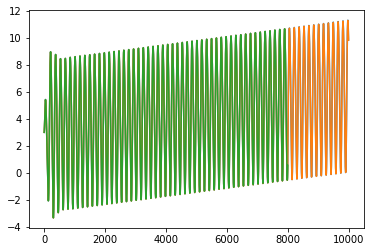

In [12]:
out_1=model.predict(train_images)
out_2=model.predict(test_images)
print(out_1.shape)
print(out_2.shape)
out_all=np.concatenate((out_1,out_2),axis=0)
out_all_original=np.concatenate((outputs_seq,outputs_seq_t),axis=0)
plt.plot(out_all*cdeno+c)
plt.plot(out_all_original*cdeno+c)
plt.plot(out_1*cdeno+c)
plt.show

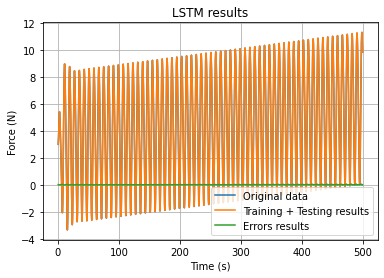

In [13]:
plt.title("LSTM results")
#plt.plot(K_load*100)
plt.plot(inputs[6:,0],out_all_original*cdeno+c)
plt.plot(inputs[6:,0],out_all*cdeno+c)
plt.plot(inputs[6:,0],out_all_original*cdeno+c-(out_all*cdeno+c))
#plt.plot(inputs[3:8000,0],out_1*cdeno+c)
plt.legend(['Original data','Training + Testing results','Errors results'])
plt.xlabel("Time (s)")
plt.ylabel("Force (N)")
plt.grid()
plt.show()
plt.close()

In [19]:
print(np.mean((np.abs(out_all[:8000]*cdeno+c-(out_all_original[:8000]*cdeno+c)))/(np.abs(out_all_original[:8000]*cdeno+c))))

0.008465796434992342


In [20]:
print(np.mean((np.abs(out_all[8000:]*cdeno+c-(out_all_original[8000:]*cdeno+c)))/(np.abs(out_all_original[8000:]*cdeno+c))))

0.013336234759187967


In [21]:
 def rnn_model(train_in,train_out,test_in,test_out,time_inputs):
    from keras.models import Sequential
    from keras.layers import Dense
    
    #for y in outputs.T:
    model = Sequential()
    model.add(tf.keras.layers.InputLayer(input_shape=(time_inputs,train_images.shape[2])))
    #model.add(tf.keras.layers.Reshape((20,5), input_shape=(20,5,1)))
    #model.add(tf.keras.layers.LSTM(4, return_sequences=False,dropout=0.1, recurrent_dropout=0.1))
    #model.add(tf.keras.layers.Reshape((20,5,1), input_shape=(20,5)))
    model.add(tf.keras.layers.SimpleRNN(1, return_sequences=False))
    model.add(tf.keras.layers.Flatten())
    model.add(Dense(1, activation='linear'))
    print(model.summary())
    model.compile(optimizer='adam', loss='mse',metrics=[tf.keras.metrics.mean_absolute_error,tf.keras.metrics.mean_absolute_percentage_error])
    model.fit(train_in, train_out,epochs=1500,batch_size=100,shuffle=True,validation_data=(test_in, test_out))

    return model

In [22]:
model_rnn=rnn_model(train_images,outputs_seq,test_images,outputs_seq_t,time_inputs)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 1)                 4         
                                                                 
 flatten_1 (Flatten)         (None, 1)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1500
80/80 [==============================] - 4s 14ms/step - loss: 0.5381 - mean_absolute_error: 0.6464 - mean_absolute_percentage_error: 657.9131 - val_loss: 0.4716 - val_mean_absolute_error: 0.5920 - val_mean_absolute_percentage_error: 1191.0369
Epoch 2/1500
80/80 [==============================] - 0s 5ms/st

80/80 [==============================] - 0s 6ms/step - loss: 0.0024 - mean_absolute_error: 0.0426 - mean_absolute_percentage_error: 45.3931 - val_loss: 0.0025 - val_mean_absolute_error: 0.0430 - val_mean_absolute_percentage_error: 72.7705
Epoch 31/1500
80/80 [==============================] - 0s 6ms/step - loss: 0.0020 - mean_absolute_error: 0.0391 - mean_absolute_percentage_error: 43.2318 - val_loss: 0.0021 - val_mean_absolute_error: 0.0397 - val_mean_absolute_percentage_error: 66.7160
Epoch 32/1500
80/80 [==============================] - 0s 6ms/step - loss: 0.0017 - mean_absolute_error: 0.0359 - mean_absolute_percentage_error: 41.1335 - val_loss: 0.0018 - val_mean_absolute_error: 0.0368 - val_mean_absolute_percentage_error: 61.2036
Epoch 33/1500
80/80 [==============================] - 0s 6ms/step - loss: 0.0014 - mean_absolute_error: 0.0329 - mean_absolute_percentage_error: 39.4460 - val_loss: 0.0015 - val_mean_absolute_error: 0.0337 - val_mean_absolute_percentage_error: 54.0110
Ep

Epoch 62/1500
80/80 [==============================] - 0s 6ms/step - loss: 2.8398e-04 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 31.0440 - val_loss: 4.7866e-04 - val_mean_absolute_error: 0.0187 - val_mean_absolute_percentage_error: 35.3688
Epoch 63/1500
80/80 [==============================] - 0s 6ms/step - loss: 2.8237e-04 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 30.7569 - val_loss: 4.5807e-04 - val_mean_absolute_error: 0.0183 - val_mean_absolute_percentage_error: 34.8694
Epoch 64/1500
80/80 [==============================] - 0s 5ms/step - loss: 2.8195e-04 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 30.8081 - val_loss: 4.6360e-04 - val_mean_absolute_error: 0.0185 - val_mean_absolute_percentage_error: 35.4960
Epoch 65/1500
80/80 [==============================] - 0s 5ms/step - loss: 2.8054e-04 - mean_absolute_error: 0.0145 - mean_absolute_percentage_error: 30.6644 - val_loss: 4.4600e-04 - val_mean_absolute_error: 0.0181 - 

80/80 [==============================] - 0s 6ms/step - loss: 2.5301e-04 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 29.3432 - val_loss: 3.6058e-04 - val_mean_absolute_error: 0.0167 - val_mean_absolute_percentage_error: 35.5486
Epoch 94/1500
80/80 [==============================] - 0s 6ms/step - loss: 2.5179e-04 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 29.2673 - val_loss: 3.7720e-04 - val_mean_absolute_error: 0.0170 - val_mean_absolute_percentage_error: 36.8496
Epoch 95/1500
80/80 [==============================] - 1s 6ms/step - loss: 2.5035e-04 - mean_absolute_error: 0.0138 - mean_absolute_percentage_error: 29.3247 - val_loss: 3.5351e-04 - val_mean_absolute_error: 0.0165 - val_mean_absolute_percentage_error: 35.5493
Epoch 96/1500
80/80 [==============================] - 0s 6ms/step - loss: 2.4861e-04 - mean_absolute_error: 0.0137 - mean_absolute_percentage_error: 29.1668 - val_loss: 3.6137e-04 - val_mean_absolute_error: 0.0167 - val_mean_absol

80/80 [==============================] - 0s 6ms/step - loss: 1.8468e-04 - mean_absolute_error: 0.0120 - mean_absolute_percentage_error: 25.4813 - val_loss: 2.4636e-04 - val_mean_absolute_error: 0.0140 - val_mean_absolute_percentage_error: 31.9310
Epoch 125/1500
80/80 [==============================] - 1s 7ms/step - loss: 1.8160e-04 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 25.3389 - val_loss: 2.3322e-04 - val_mean_absolute_error: 0.0137 - val_mean_absolute_percentage_error: 30.4636
Epoch 126/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.7742e-04 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 25.1733 - val_loss: 2.4292e-04 - val_mean_absolute_error: 0.0138 - val_mean_absolute_percentage_error: 31.6669
Epoch 127/1500
80/80 [==============================] - 0s 6ms/step - loss: 1.7363e-04 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 24.8377 - val_loss: 2.2538e-04 - val_mean_absolute_error: 0.0135 - val_mean_ab

80/80 [==============================] - 0s 5ms/step - loss: 3.4016e-05 - mean_absolute_error: 0.0053 - mean_absolute_percentage_error: 10.6005 - val_loss: 3.3716e-05 - val_mean_absolute_error: 0.0053 - val_mean_absolute_percentage_error: 13.4281
Epoch 156/1500
80/80 [==============================] - 1s 6ms/step - loss: 3.0863e-05 - mean_absolute_error: 0.0051 - mean_absolute_percentage_error: 9.8280 - val_loss: 3.2144e-05 - val_mean_absolute_error: 0.0050 - val_mean_absolute_percentage_error: 12.4107
Epoch 157/1500
80/80 [==============================] - 0s 5ms/step - loss: 2.8005e-05 - mean_absolute_error: 0.0048 - mean_absolute_percentage_error: 9.2960 - val_loss: 2.8481e-05 - val_mean_absolute_error: 0.0049 - val_mean_absolute_percentage_error: 11.2181
Epoch 158/1500
80/80 [==============================] - 0s 5ms/step - loss: 2.5515e-05 - mean_absolute_error: 0.0046 - mean_absolute_percentage_error: 8.7192 - val_loss: 2.6385e-05 - val_mean_absolute_error: 0.0047 - val_mean_absol

80/80 [==============================] - 0s 5ms/step - loss: 1.6658e-05 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 4.4339 - val_loss: 2.6140e-05 - val_mean_absolute_error: 0.0042 - val_mean_absolute_percentage_error: 5.5966
Epoch 187/1500
80/80 [==============================] - 1s 8ms/step - loss: 1.6623e-05 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 4.3311 - val_loss: 2.5665e-05 - val_mean_absolute_error: 0.0041 - val_mean_absolute_percentage_error: 5.5956
Epoch 188/1500
80/80 [==============================] - 0s 6ms/step - loss: 1.6634e-05 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 4.3015 - val_loss: 2.7781e-05 - val_mean_absolute_error: 0.0043 - val_mean_absolute_percentage_error: 5.8350
Epoch 189/1500
80/80 [==============================] - 0s 6ms/step - loss: 1.6478e-05 - mean_absolute_error: 0.0033 - mean_absolute_percentage_error: 4.2829 - val_loss: 2.8508e-05 - val_mean_absolute_error: 0.0044 - val_mean_absolute_

80/80 [==============================] - 1s 7ms/step - loss: 1.4974e-05 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 3.8347 - val_loss: 2.7368e-05 - val_mean_absolute_error: 0.0044 - val_mean_absolute_percentage_error: 5.0346
Epoch 218/1500
80/80 [==============================] - 0s 6ms/step - loss: 1.5217e-05 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 3.9172 - val_loss: 2.9512e-05 - val_mean_absolute_error: 0.0045 - val_mean_absolute_percentage_error: 4.7707
Epoch 219/1500
80/80 [==============================] - 1s 7ms/step - loss: 1.5069e-05 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 3.7675 - val_loss: 2.7348e-05 - val_mean_absolute_error: 0.0044 - val_mean_absolute_percentage_error: 4.6625
Epoch 220/1500
80/80 [==============================] - 0s 6ms/step - loss: 1.4968e-05 - mean_absolute_error: 0.0031 - mean_absolute_percentage_error: 3.8117 - val_loss: 3.0623e-05 - val_mean_absolute_error: 0.0043 - val_mean_absolute_

80/80 [==============================] - 1s 7ms/step - loss: 1.3783e-05 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 3.3323 - val_loss: 2.4667e-05 - val_mean_absolute_error: 0.0039 - val_mean_absolute_percentage_error: 5.2273
Epoch 249/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.3183e-05 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 3.3555 - val_loss: 2.6413e-05 - val_mean_absolute_error: 0.0042 - val_mean_absolute_percentage_error: 4.4292
Epoch 250/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.3172e-05 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 3.2979 - val_loss: 2.4426e-05 - val_mean_absolute_error: 0.0041 - val_mean_absolute_percentage_error: 4.5386
Epoch 251/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.3090e-05 - mean_absolute_error: 0.0029 - mean_absolute_percentage_error: 3.4022 - val_loss: 2.2036e-05 - val_mean_absolute_error: 0.0037 - val_mean_absolute_

80/80 [==============================] - 0s 5ms/step - loss: 1.1489e-05 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 3.1752 - val_loss: 2.0289e-05 - val_mean_absolute_error: 0.0035 - val_mean_absolute_percentage_error: 4.4570
Epoch 280/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.1362e-05 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 2.9570 - val_loss: 2.2577e-05 - val_mean_absolute_error: 0.0036 - val_mean_absolute_percentage_error: 4.2474
Epoch 281/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.1411e-05 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 3.0376 - val_loss: 2.2133e-05 - val_mean_absolute_error: 0.0036 - val_mean_absolute_percentage_error: 4.6315
Epoch 282/1500
80/80 [==============================] - 0s 6ms/step - loss: 1.1324e-05 - mean_absolute_error: 0.0027 - mean_absolute_percentage_error: 3.0022 - val_loss: 2.8416e-05 - val_mean_absolute_error: 0.0043 - val_mean_absolute_

80/80 [==============================] - 0s 4ms/step - loss: 9.7935e-06 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 2.5297 - val_loss: 2.0665e-05 - val_mean_absolute_error: 0.0035 - val_mean_absolute_percentage_error: 3.5438
Epoch 311/1500
80/80 [==============================] - 0s 5ms/step - loss: 9.9752e-06 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 2.6130 - val_loss: 2.3854e-05 - val_mean_absolute_error: 0.0040 - val_mean_absolute_percentage_error: 3.0254
Epoch 312/1500
80/80 [==============================] - 0s 4ms/step - loss: 9.6170e-06 - mean_absolute_error: 0.0024 - mean_absolute_percentage_error: 2.5726 - val_loss: 1.6928e-05 - val_mean_absolute_error: 0.0034 - val_mean_absolute_percentage_error: 3.9149
Epoch 313/1500
80/80 [==============================] - 0s 4ms/step - loss: 9.6242e-06 - mean_absolute_error: 0.0025 - mean_absolute_percentage_error: 2.6282 - val_loss: 1.4768e-05 - val_mean_absolute_error: 0.0031 - val_mean_absolute_

80/80 [==============================] - 0s 4ms/step - loss: 8.4443e-06 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 2.2303 - val_loss: 1.7211e-05 - val_mean_absolute_error: 0.0033 - val_mean_absolute_percentage_error: 2.9846
Epoch 342/1500
80/80 [==============================] - 0s 5ms/step - loss: 8.3511e-06 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 2.3714 - val_loss: 1.8434e-05 - val_mean_absolute_error: 0.0034 - val_mean_absolute_percentage_error: 3.1580
Epoch 343/1500
80/80 [==============================] - 0s 4ms/step - loss: 8.2310e-06 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 2.2630 - val_loss: 1.4840e-05 - val_mean_absolute_error: 0.0031 - val_mean_absolute_percentage_error: 3.6722
Epoch 344/1500
80/80 [==============================] - 0s 4ms/step - loss: 8.4021e-06 - mean_absolute_error: 0.0023 - mean_absolute_percentage_error: 2.2169 - val_loss: 1.6362e-05 - val_mean_absolute_error: 0.0032 - val_mean_absolute_

80/80 [==============================] - 0s 4ms/step - loss: 7.2086e-06 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 2.0185 - val_loss: 1.4168e-05 - val_mean_absolute_error: 0.0029 - val_mean_absolute_percentage_error: 3.6269
Epoch 373/1500
80/80 [==============================] - 0s 4ms/step - loss: 7.4507e-06 - mean_absolute_error: 0.0022 - mean_absolute_percentage_error: 1.9600 - val_loss: 1.3378e-05 - val_mean_absolute_error: 0.0030 - val_mean_absolute_percentage_error: 3.1050
Epoch 374/1500
80/80 [==============================] - 0s 5ms/step - loss: 7.0681e-06 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 1.8243 - val_loss: 1.3679e-05 - val_mean_absolute_error: 0.0028 - val_mean_absolute_percentage_error: 3.4912
Epoch 375/1500
80/80 [==============================] - 0s 4ms/step - loss: 7.2129e-06 - mean_absolute_error: 0.0021 - mean_absolute_percentage_error: 1.9564 - val_loss: 1.7645e-05 - val_mean_absolute_error: 0.0033 - val_mean_absolute_

80/80 [==============================] - 0s 5ms/step - loss: 6.3074e-06 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 1.8244 - val_loss: 1.2484e-05 - val_mean_absolute_error: 0.0028 - val_mean_absolute_percentage_error: 2.6510
Epoch 404/1500
80/80 [==============================] - 0s 5ms/step - loss: 6.4008e-06 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 1.7125 - val_loss: 1.3682e-05 - val_mean_absolute_error: 0.0029 - val_mean_absolute_percentage_error: 2.3949
Epoch 405/1500
80/80 [==============================] - 0s 4ms/step - loss: 6.0484e-06 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 1.6995 - val_loss: 1.3589e-05 - val_mean_absolute_error: 0.0029 - val_mean_absolute_percentage_error: 2.3700
Epoch 406/1500
80/80 [==============================] - 0s 6ms/step - loss: 6.2029e-06 - mean_absolute_error: 0.0020 - mean_absolute_percentage_error: 1.8322 - val_loss: 1.1841e-05 - val_mean_absolute_error: 0.0027 - val_mean_absolute_

80/80 [==============================] - 0s 4ms/step - loss: 5.2262e-06 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 1.4913 - val_loss: 1.3794e-05 - val_mean_absolute_error: 0.0029 - val_mean_absolute_percentage_error: 2.0382
Epoch 435/1500
80/80 [==============================] - 0s 4ms/step - loss: 5.3441e-06 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 1.5301 - val_loss: 1.2374e-05 - val_mean_absolute_error: 0.0029 - val_mean_absolute_percentage_error: 1.8925
Epoch 436/1500
80/80 [==============================] - 0s 4ms/step - loss: 5.2045e-06 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 1.4983 - val_loss: 1.1616e-05 - val_mean_absolute_error: 0.0026 - val_mean_absolute_percentage_error: 2.5844
Epoch 437/1500
80/80 [==============================] - 0s 4ms/step - loss: 5.1679e-06 - mean_absolute_error: 0.0018 - mean_absolute_percentage_error: 1.4790 - val_loss: 1.2393e-05 - val_mean_absolute_error: 0.0027 - val_mean_absolute_

80/80 [==============================] - 0s 5ms/step - loss: 4.6012e-06 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 1.3366 - val_loss: 1.1902e-05 - val_mean_absolute_error: 0.0028 - val_mean_absolute_percentage_error: 1.5466
Epoch 466/1500
80/80 [==============================] - 0s 5ms/step - loss: 4.5542e-06 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 1.2508 - val_loss: 1.1197e-05 - val_mean_absolute_error: 0.0027 - val_mean_absolute_percentage_error: 1.7094
Epoch 467/1500
80/80 [==============================] - 0s 5ms/step - loss: 4.6303e-06 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 1.4529 - val_loss: 9.0849e-06 - val_mean_absolute_error: 0.0024 - val_mean_absolute_percentage_error: 2.3453
Epoch 468/1500
80/80 [==============================] - 0s 5ms/step - loss: 4.5200e-06 - mean_absolute_error: 0.0017 - mean_absolute_percentage_error: 1.2605 - val_loss: 1.2988e-05 - val_mean_absolute_error: 0.0027 - val_mean_absolute_

80/80 [==============================] - 0s 4ms/step - loss: 3.9765e-06 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 1.2639 - val_loss: 1.0174e-05 - val_mean_absolute_error: 0.0026 - val_mean_absolute_percentage_error: 1.5283
Epoch 497/1500
80/80 [==============================] - 0s 5ms/step - loss: 4.0592e-06 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 1.3057 - val_loss: 1.0968e-05 - val_mean_absolute_error: 0.0027 - val_mean_absolute_percentage_error: 1.2685
Epoch 498/1500
80/80 [==============================] - 0s 4ms/step - loss: 3.9992e-06 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 1.2746 - val_loss: 8.9241e-06 - val_mean_absolute_error: 0.0024 - val_mean_absolute_percentage_error: 1.7563
Epoch 499/1500
80/80 [==============================] - 0s 4ms/step - loss: 3.9995e-06 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 1.3874 - val_loss: 9.1063e-06 - val_mean_absolute_error: 0.0025 - val_mean_absolute_

80/80 [==============================] - 0s 4ms/step - loss: 3.6643e-06 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 1.2352 - val_loss: 8.7249e-06 - val_mean_absolute_error: 0.0022 - val_mean_absolute_percentage_error: 1.6766
Epoch 528/1500
80/80 [==============================] - 1s 7ms/step - loss: 3.5687e-06 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 1.2352 - val_loss: 8.5485e-06 - val_mean_absolute_error: 0.0023 - val_mean_absolute_percentage_error: 1.5080
Epoch 529/1500
80/80 [==============================] - 0s 5ms/step - loss: 3.7262e-06 - mean_absolute_error: 0.0016 - mean_absolute_percentage_error: 1.2354 - val_loss: 8.7705e-06 - val_mean_absolute_error: 0.0022 - val_mean_absolute_percentage_error: 1.9575
Epoch 530/1500
80/80 [==============================] - 0s 4ms/step - loss: 3.4943e-06 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 1.0761 - val_loss: 7.3859e-06 - val_mean_absolute_error: 0.0021 - val_mean_absolute_

80/80 [==============================] - 0s 6ms/step - loss: 3.2711e-06 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 1.1427 - val_loss: 8.5631e-06 - val_mean_absolute_error: 0.0024 - val_mean_absolute_percentage_error: 1.1315
Epoch 559/1500
80/80 [==============================] - 0s 5ms/step - loss: 3.2463e-06 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 1.0926 - val_loss: 7.8113e-06 - val_mean_absolute_error: 0.0021 - val_mean_absolute_percentage_error: 1.5060
Epoch 560/1500
80/80 [==============================] - 0s 5ms/step - loss: 3.2195e-06 - mean_absolute_error: 0.0015 - mean_absolute_percentage_error: 1.1729 - val_loss: 7.9964e-06 - val_mean_absolute_error: 0.0022 - val_mean_absolute_percentage_error: 1.4699
Epoch 561/1500
80/80 [==============================] - 0s 5ms/step - loss: 3.2489e-06 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 1.1282 - val_loss: 7.9118e-06 - val_mean_absolute_error: 0.0022 - val_mean_absolute_

80/80 [==============================] - 0s 5ms/step - loss: 2.9091e-06 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 1.0307 - val_loss: 7.7257e-06 - val_mean_absolute_error: 0.0020 - val_mean_absolute_percentage_error: 1.6717
Epoch 590/1500
80/80 [==============================] - 0s 6ms/step - loss: 2.8534e-06 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 0.8978 - val_loss: 7.3325e-06 - val_mean_absolute_error: 0.0020 - val_mean_absolute_percentage_error: 1.7765
Epoch 591/1500
80/80 [==============================] - 0s 5ms/step - loss: 2.8528e-06 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 0.9802 - val_loss: 5.2408e-06 - val_mean_absolute_error: 0.0019 - val_mean_absolute_percentage_error: 1.7757
Epoch 592/1500
80/80 [==============================] - 0s 6ms/step - loss: 2.9396e-06 - mean_absolute_error: 0.0014 - mean_absolute_percentage_error: 1.0655 - val_loss: 5.9275e-06 - val_mean_absolute_error: 0.0020 - val_mean_absolute_

80/80 [==============================] - 0s 5ms/step - loss: 2.6028e-06 - mean_absolute_error: 0.0013 - mean_absolute_percentage_error: 0.9820 - val_loss: 6.3668e-06 - val_mean_absolute_error: 0.0020 - val_mean_absolute_percentage_error: 1.1920
Epoch 621/1500
80/80 [==============================] - 0s 5ms/step - loss: 2.6361e-06 - mean_absolute_error: 0.0013 - mean_absolute_percentage_error: 0.9836 - val_loss: 6.5814e-06 - val_mean_absolute_error: 0.0020 - val_mean_absolute_percentage_error: 1.1417
Epoch 622/1500
80/80 [==============================] - 0s 5ms/step - loss: 2.5061e-06 - mean_absolute_error: 0.0013 - mean_absolute_percentage_error: 0.9426 - val_loss: 6.5553e-06 - val_mean_absolute_error: 0.0020 - val_mean_absolute_percentage_error: 1.0919
Epoch 623/1500
80/80 [==============================] - 0s 5ms/step - loss: 2.5580e-06 - mean_absolute_error: 0.0013 - mean_absolute_percentage_error: 0.9266 - val_loss: 8.4392e-06 - val_mean_absolute_error: 0.0021 - val_mean_absolute_

80/80 [==============================] - 0s 5ms/step - loss: 2.4837e-06 - mean_absolute_error: 0.0013 - mean_absolute_percentage_error: 1.0463 - val_loss: 7.9975e-06 - val_mean_absolute_error: 0.0022 - val_mean_absolute_percentage_error: 1.0580
Epoch 652/1500
80/80 [==============================] - 0s 5ms/step - loss: 2.4025e-06 - mean_absolute_error: 0.0012 - mean_absolute_percentage_error: 0.9821 - val_loss: 4.7448e-06 - val_mean_absolute_error: 0.0017 - val_mean_absolute_percentage_error: 1.9696
Epoch 653/1500
80/80 [==============================] - 0s 5ms/step - loss: 2.3584e-06 - mean_absolute_error: 0.0012 - mean_absolute_percentage_error: 0.9613 - val_loss: 6.1751e-06 - val_mean_absolute_error: 0.0020 - val_mean_absolute_percentage_error: 0.8573
Epoch 654/1500
80/80 [==============================] - 0s 6ms/step - loss: 2.5845e-06 - mean_absolute_error: 0.0013 - mean_absolute_percentage_error: 1.1597 - val_loss: 5.0420e-06 - val_mean_absolute_error: 0.0017 - val_mean_absolute_

80/80 [==============================] - 0s 4ms/step - loss: 2.1181e-06 - mean_absolute_error: 0.0012 - mean_absolute_percentage_error: 0.8467 - val_loss: 4.7826e-06 - val_mean_absolute_error: 0.0017 - val_mean_absolute_percentage_error: 1.3271
Epoch 683/1500
80/80 [==============================] - 0s 5ms/step - loss: 2.1651e-06 - mean_absolute_error: 0.0012 - mean_absolute_percentage_error: 0.8472 - val_loss: 5.7724e-06 - val_mean_absolute_error: 0.0019 - val_mean_absolute_percentage_error: 0.9005
Epoch 684/1500
80/80 [==============================] - 0s 4ms/step - loss: 2.3439e-06 - mean_absolute_error: 0.0012 - mean_absolute_percentage_error: 1.0881 - val_loss: 5.9484e-06 - val_mean_absolute_error: 0.0018 - val_mean_absolute_percentage_error: 1.0447
Epoch 685/1500
80/80 [==============================] - 0s 5ms/step - loss: 2.1804e-06 - mean_absolute_error: 0.0012 - mean_absolute_percentage_error: 0.8725 - val_loss: 5.5654e-06 - val_mean_absolute_error: 0.0019 - val_mean_absolute_

80/80 [==============================] - 0s 5ms/step - loss: 2.0338e-06 - mean_absolute_error: 0.0012 - mean_absolute_percentage_error: 0.8535 - val_loss: 6.1891e-06 - val_mean_absolute_error: 0.0020 - val_mean_absolute_percentage_error: 1.1789
Epoch 714/1500
80/80 [==============================] - 0s 5ms/step - loss: 2.0529e-06 - mean_absolute_error: 0.0012 - mean_absolute_percentage_error: 0.8984 - val_loss: 4.6581e-06 - val_mean_absolute_error: 0.0018 - val_mean_absolute_percentage_error: 1.1852
Epoch 715/1500
80/80 [==============================] - 0s 4ms/step - loss: 2.1167e-06 - mean_absolute_error: 0.0012 - mean_absolute_percentage_error: 0.9526 - val_loss: 4.6913e-06 - val_mean_absolute_error: 0.0017 - val_mean_absolute_percentage_error: 1.2100
Epoch 716/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.9445e-06 - mean_absolute_error: 0.0011 - mean_absolute_percentage_error: 0.8158 - val_loss: 5.5583e-06 - val_mean_absolute_error: 0.0019 - val_mean_absolute_

80/80 [==============================] - 0s 5ms/step - loss: 1.8566e-06 - mean_absolute_error: 0.0011 - mean_absolute_percentage_error: 0.8252 - val_loss: 3.6417e-06 - val_mean_absolute_error: 0.0015 - val_mean_absolute_percentage_error: 1.5316
Epoch 745/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.8756e-06 - mean_absolute_error: 0.0011 - mean_absolute_percentage_error: 0.8605 - val_loss: 7.0402e-06 - val_mean_absolute_error: 0.0019 - val_mean_absolute_percentage_error: 0.8076
Epoch 746/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.7781e-06 - mean_absolute_error: 0.0011 - mean_absolute_percentage_error: 0.7961 - val_loss: 6.0258e-06 - val_mean_absolute_error: 0.0018 - val_mean_absolute_percentage_error: 0.7777
Epoch 747/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.7657e-06 - mean_absolute_error: 0.0011 - mean_absolute_percentage_error: 0.7671 - val_loss: 6.3085e-06 - val_mean_absolute_error: 0.0019 - val_mean_absolute_

80/80 [==============================] - 1s 6ms/step - loss: 1.6814e-06 - mean_absolute_error: 0.0011 - mean_absolute_percentage_error: 0.7130 - val_loss: 4.8393e-06 - val_mean_absolute_error: 0.0017 - val_mean_absolute_percentage_error: 0.8560
Epoch 776/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.7843e-06 - mean_absolute_error: 0.0011 - mean_absolute_percentage_error: 0.8513 - val_loss: 4.4241e-06 - val_mean_absolute_error: 0.0017 - val_mean_absolute_percentage_error: 0.7709
Epoch 777/1500
80/80 [==============================] - 1s 6ms/step - loss: 1.7224e-06 - mean_absolute_error: 0.0011 - mean_absolute_percentage_error: 0.7920 - val_loss: 3.1345e-06 - val_mean_absolute_error: 0.0015 - val_mean_absolute_percentage_error: 1.4184
Epoch 778/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.7219e-06 - mean_absolute_error: 0.0011 - mean_absolute_percentage_error: 0.7742 - val_loss: 4.3134e-06 - val_mean_absolute_error: 0.0017 - val_mean_absolute_

80/80 [==============================] - 1s 7ms/step - loss: 1.5643e-06 - mean_absolute_error: 0.0010 - mean_absolute_percentage_error: 0.6862 - val_loss: 4.1112e-06 - val_mean_absolute_error: 0.0015 - val_mean_absolute_percentage_error: 0.9331
Epoch 807/1500
80/80 [==============================] - 0s 6ms/step - loss: 1.6089e-06 - mean_absolute_error: 0.0010 - mean_absolute_percentage_error: 0.7976 - val_loss: 4.7106e-06 - val_mean_absolute_error: 0.0015 - val_mean_absolute_percentage_error: 0.9683
Epoch 808/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.5669e-06 - mean_absolute_error: 0.0010 - mean_absolute_percentage_error: 0.7030 - val_loss: 3.0521e-06 - val_mean_absolute_error: 0.0014 - val_mean_absolute_percentage_error: 1.4683
Epoch 809/1500
80/80 [==============================] - 1s 7ms/step - loss: 1.6208e-06 - mean_absolute_error: 0.0010 - mean_absolute_percentage_error: 0.8537 - val_loss: 3.2129e-06 - val_mean_absolute_error: 0.0015 - val_mean_absolute_

80/80 [==============================] - 0s 5ms/step - loss: 1.5425e-06 - mean_absolute_error: 0.0010 - mean_absolute_percentage_error: 0.7465 - val_loss: 3.4006e-06 - val_mean_absolute_error: 0.0014 - val_mean_absolute_percentage_error: 0.9685
Epoch 838/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.5364e-06 - mean_absolute_error: 0.0010 - mean_absolute_percentage_error: 0.7933 - val_loss: 5.1149e-06 - val_mean_absolute_error: 0.0017 - val_mean_absolute_percentage_error: 0.9560
Epoch 839/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.5218e-06 - mean_absolute_error: 9.9687e-04 - mean_absolute_percentage_error: 0.7080 - val_loss: 3.4285e-06 - val_mean_absolute_error: 0.0014 - val_mean_absolute_percentage_error: 1.2233
Epoch 840/1500
80/80 [==============================] - 0s 6ms/step - loss: 1.4164e-06 - mean_absolute_error: 9.6847e-04 - mean_absolute_percentage_error: 0.6458 - val_loss: 2.8077e-06 - val_mean_absolute_error: 0.0014 - val_mean_a

80/80 [==============================] - 0s 5ms/step - loss: 1.4329e-06 - mean_absolute_error: 9.7093e-04 - mean_absolute_percentage_error: 0.7454 - val_loss: 2.8552e-06 - val_mean_absolute_error: 0.0013 - val_mean_absolute_percentage_error: 1.2681
Epoch 869/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.4169e-06 - mean_absolute_error: 9.6464e-04 - mean_absolute_percentage_error: 0.7214 - val_loss: 3.6524e-06 - val_mean_absolute_error: 0.0013 - val_mean_absolute_percentage_error: 1.1534
Epoch 870/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.3605e-06 - mean_absolute_error: 9.4403e-04 - mean_absolute_percentage_error: 0.7254 - val_loss: 4.3759e-06 - val_mean_absolute_error: 0.0017 - val_mean_absolute_percentage_error: 0.9369
Epoch 871/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.4469e-06 - mean_absolute_error: 9.7487e-04 - mean_absolute_percentage_error: 0.7893 - val_loss: 3.0699e-06 - val_mean_absolute_error: 0.0013 - va

80/80 [==============================] - 0s 4ms/step - loss: 1.2806e-06 - mean_absolute_error: 9.1999e-04 - mean_absolute_percentage_error: 0.6680 - val_loss: 3.2534e-06 - val_mean_absolute_error: 0.0015 - val_mean_absolute_percentage_error: 0.7183
Epoch 900/1500
80/80 [==============================] - 0s 6ms/step - loss: 1.3758e-06 - mean_absolute_error: 9.4803e-04 - mean_absolute_percentage_error: 0.7112 - val_loss: 3.7484e-06 - val_mean_absolute_error: 0.0014 - val_mean_absolute_percentage_error: 0.9132
Epoch 901/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.2792e-06 - mean_absolute_error: 9.2119e-04 - mean_absolute_percentage_error: 0.6382 - val_loss: 3.6209e-06 - val_mean_absolute_error: 0.0015 - val_mean_absolute_percentage_error: 0.9280
Epoch 902/1500
80/80 [==============================] - 0s 4ms/step - loss: 1.4247e-06 - mean_absolute_error: 9.6402e-04 - mean_absolute_percentage_error: 0.8007 - val_loss: 3.8345e-06 - val_mean_absolute_error: 0.0015 - va

80/80 [==============================] - 0s 5ms/step - loss: 1.3320e-06 - mean_absolute_error: 9.3165e-04 - mean_absolute_percentage_error: 0.7854 - val_loss: 2.3613e-06 - val_mean_absolute_error: 0.0012 - val_mean_absolute_percentage_error: 1.3298
Epoch 931/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.2840e-06 - mean_absolute_error: 9.1758e-04 - mean_absolute_percentage_error: 0.7246 - val_loss: 4.5159e-06 - val_mean_absolute_error: 0.0016 - val_mean_absolute_percentage_error: 1.1672
Epoch 932/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.2260e-06 - mean_absolute_error: 8.9943e-04 - mean_absolute_percentage_error: 0.6826 - val_loss: 2.5148e-06 - val_mean_absolute_error: 0.0013 - val_mean_absolute_percentage_error: 0.9975
Epoch 933/1500
80/80 [==============================] - 0s 6ms/step - loss: 1.2197e-06 - mean_absolute_error: 9.0021e-04 - mean_absolute_percentage_error: 0.7108 - val_loss: 4.1104e-06 - val_mean_absolute_error: 0.0015 - va

80/80 [==============================] - 0s 5ms/step - loss: 1.1080e-06 - mean_absolute_error: 8.6019e-04 - mean_absolute_percentage_error: 0.6072 - val_loss: 2.4102e-06 - val_mean_absolute_error: 0.0013 - val_mean_absolute_percentage_error: 0.9193
Epoch 962/1500
80/80 [==============================] - 0s 6ms/step - loss: 1.1265e-06 - mean_absolute_error: 8.6698e-04 - mean_absolute_percentage_error: 0.6317 - val_loss: 5.3163e-06 - val_mean_absolute_error: 0.0016 - val_mean_absolute_percentage_error: 0.8628
Epoch 963/1500
80/80 [==============================] - 0s 6ms/step - loss: 1.1943e-06 - mean_absolute_error: 8.8301e-04 - mean_absolute_percentage_error: 0.6726 - val_loss: 3.3305e-06 - val_mean_absolute_error: 0.0013 - val_mean_absolute_percentage_error: 0.7655
Epoch 964/1500
80/80 [==============================] - 1s 7ms/step - loss: 1.2408e-06 - mean_absolute_error: 9.0055e-04 - mean_absolute_percentage_error: 0.6749 - val_loss: 3.0177e-06 - val_mean_absolute_error: 0.0013 - va

80/80 [==============================] - 0s 5ms/step - loss: 1.3186e-06 - mean_absolute_error: 9.2040e-04 - mean_absolute_percentage_error: 0.9256 - val_loss: 2.1122e-06 - val_mean_absolute_error: 0.0011 - val_mean_absolute_percentage_error: 1.5922
Epoch 993/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.1224e-06 - mean_absolute_error: 8.5703e-04 - mean_absolute_percentage_error: 0.5786 - val_loss: 3.0073e-06 - val_mean_absolute_error: 0.0015 - val_mean_absolute_percentage_error: 0.8645
Epoch 994/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.1424e-06 - mean_absolute_error: 8.6274e-04 - mean_absolute_percentage_error: 0.6372 - val_loss: 2.8647e-06 - val_mean_absolute_error: 0.0013 - val_mean_absolute_percentage_error: 0.6575
Epoch 995/1500
80/80 [==============================] - 0s 6ms/step - loss: 1.1781e-06 - mean_absolute_error: 8.7353e-04 - mean_absolute_percentage_error: 0.7243 - val_loss: 2.6618e-06 - val_mean_absolute_error: 0.0013 - va

80/80 [==============================] - 0s 4ms/step - loss: 1.0031e-06 - mean_absolute_error: 8.1712e-04 - mean_absolute_percentage_error: 0.5799 - val_loss: 2.1468e-06 - val_mean_absolute_error: 0.0012 - val_mean_absolute_percentage_error: 1.1779
Epoch 1024/1500
80/80 [==============================] - 0s 6ms/step - loss: 1.1101e-06 - mean_absolute_error: 8.5229e-04 - mean_absolute_percentage_error: 0.7387 - val_loss: 3.0391e-06 - val_mean_absolute_error: 0.0013 - val_mean_absolute_percentage_error: 0.5462
Epoch 1025/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.0679e-06 - mean_absolute_error: 8.3910e-04 - mean_absolute_percentage_error: 0.6840 - val_loss: 3.5818e-06 - val_mean_absolute_error: 0.0014 - val_mean_absolute_percentage_error: 0.8161
Epoch 1026/1500
80/80 [==============================] - 0s 4ms/step - loss: 1.0384e-06 - mean_absolute_error: 8.2918e-04 - mean_absolute_percentage_error: 0.6061 - val_loss: 3.6770e-06 - val_mean_absolute_error: 0.0013 -

Epoch 1054/1500
80/80 [==============================] - 0s 4ms/step - loss: 1.0677e-06 - mean_absolute_error: 8.3183e-04 - mean_absolute_percentage_error: 0.6415 - val_loss: 3.4911e-06 - val_mean_absolute_error: 0.0015 - val_mean_absolute_percentage_error: 1.2374
Epoch 1055/1500
80/80 [==============================] - 0s 4ms/step - loss: 1.0220e-06 - mean_absolute_error: 8.1957e-04 - mean_absolute_percentage_error: 0.5800 - val_loss: 2.7894e-06 - val_mean_absolute_error: 0.0013 - val_mean_absolute_percentage_error: 0.6251
Epoch 1056/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.0826e-06 - mean_absolute_error: 8.3987e-04 - mean_absolute_percentage_error: 0.7094 - val_loss: 3.2192e-06 - val_mean_absolute_error: 0.0013 - val_mean_absolute_percentage_error: 0.5062
Epoch 1057/1500
80/80 [==============================] - 0s 4ms/step - loss: 1.0037e-06 - mean_absolute_error: 8.1332e-04 - mean_absolute_percentage_error: 0.6008 - val_loss: 2.6487e-06 - val_mean_absolute

Epoch 1085/1500
80/80 [==============================] - 0s 4ms/step - loss: 9.5675e-07 - mean_absolute_error: 7.9413e-04 - mean_absolute_percentage_error: 0.6180 - val_loss: 2.6976e-06 - val_mean_absolute_error: 0.0013 - val_mean_absolute_percentage_error: 0.7494
Epoch 1086/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.0682e-06 - mean_absolute_error: 8.3214e-04 - mean_absolute_percentage_error: 0.6779 - val_loss: 1.7741e-06 - val_mean_absolute_error: 0.0011 - val_mean_absolute_percentage_error: 1.2730
Epoch 1087/1500
80/80 [==============================] - 0s 4ms/step - loss: 1.0146e-06 - mean_absolute_error: 8.1414e-04 - mean_absolute_percentage_error: 0.6003 - val_loss: 2.4328e-06 - val_mean_absolute_error: 0.0012 - val_mean_absolute_percentage_error: 0.5324
Epoch 1088/1500
80/80 [==============================] - 0s 4ms/step - loss: 9.8468e-07 - mean_absolute_error: 8.0380e-04 - mean_absolute_percentage_error: 0.6273 - val_loss: 3.1460e-06 - val_mean_absolute

Epoch 1116/1500
80/80 [==============================] - 0s 4ms/step - loss: 9.6742e-07 - mean_absolute_error: 7.9541e-04 - mean_absolute_percentage_error: 0.6677 - val_loss: 2.4197e-06 - val_mean_absolute_error: 0.0012 - val_mean_absolute_percentage_error: 1.6025
Epoch 1117/1500
80/80 [==============================] - 0s 5ms/step - loss: 9.3859e-07 - mean_absolute_error: 7.8443e-04 - mean_absolute_percentage_error: 0.6401 - val_loss: 1.8816e-06 - val_mean_absolute_error: 0.0011 - val_mean_absolute_percentage_error: 1.0115
Epoch 1118/1500
80/80 [==============================] - 0s 4ms/step - loss: 9.7383e-07 - mean_absolute_error: 7.9516e-04 - mean_absolute_percentage_error: 0.6399 - val_loss: 2.2323e-06 - val_mean_absolute_error: 0.0011 - val_mean_absolute_percentage_error: 1.0221
Epoch 1119/1500
80/80 [==============================] - 0s 5ms/step - loss: 1.0108e-06 - mean_absolute_error: 8.1552e-04 - mean_absolute_percentage_error: 0.6227 - val_loss: 2.3379e-06 - val_mean_absolute

Epoch 1147/1500
80/80 [==============================] - 0s 5ms/step - loss: 9.4792e-07 - mean_absolute_error: 7.8935e-04 - mean_absolute_percentage_error: 0.6896 - val_loss: 2.6217e-06 - val_mean_absolute_error: 0.0012 - val_mean_absolute_percentage_error: 0.6204
Epoch 1148/1500
80/80 [==============================] - 0s 6ms/step - loss: 8.2724e-07 - mean_absolute_error: 7.4293e-04 - mean_absolute_percentage_error: 0.5342 - val_loss: 2.6599e-06 - val_mean_absolute_error: 0.0012 - val_mean_absolute_percentage_error: 0.5157
Epoch 1149/1500
80/80 [==============================] - 0s 5ms/step - loss: 8.7534e-07 - mean_absolute_error: 7.6270e-04 - mean_absolute_percentage_error: 0.5330 - val_loss: 2.5179e-06 - val_mean_absolute_error: 0.0012 - val_mean_absolute_percentage_error: 0.6037
Epoch 1150/1500
80/80 [==============================] - 0s 6ms/step - loss: 8.5707e-07 - mean_absolute_error: 7.5263e-04 - mean_absolute_percentage_error: 0.5528 - val_loss: 2.9926e-06 - val_mean_absolute

Epoch 1178/1500
80/80 [==============================] - 0s 6ms/step - loss: 8.5078e-07 - mean_absolute_error: 7.4746e-04 - mean_absolute_percentage_error: 0.5898 - val_loss: 2.3238e-06 - val_mean_absolute_error: 0.0012 - val_mean_absolute_percentage_error: 0.6486
Epoch 1179/1500
80/80 [==============================] - 0s 5ms/step - loss: 8.8861e-07 - mean_absolute_error: 7.6211e-04 - mean_absolute_percentage_error: 0.6035 - val_loss: 1.5631e-06 - val_mean_absolute_error: 0.0010 - val_mean_absolute_percentage_error: 1.0129
Epoch 1180/1500
80/80 [==============================] - 0s 6ms/step - loss: 8.4189e-07 - mean_absolute_error: 7.4222e-04 - mean_absolute_percentage_error: 0.6273 - val_loss: 1.8700e-06 - val_mean_absolute_error: 0.0011 - val_mean_absolute_percentage_error: 0.6036
Epoch 1181/1500
80/80 [==============================] - 0s 6ms/step - loss: 8.3820e-07 - mean_absolute_error: 7.4326e-04 - mean_absolute_percentage_error: 0.6253 - val_loss: 2.4784e-06 - val_mean_absolute

Epoch 1209/1500
80/80 [==============================] - 0s 6ms/step - loss: 8.2888e-07 - mean_absolute_error: 7.3656e-04 - mean_absolute_percentage_error: 0.5663 - val_loss: 2.8656e-06 - val_mean_absolute_error: 0.0012 - val_mean_absolute_percentage_error: 0.4468
Epoch 1210/1500
80/80 [==============================] - 0s 5ms/step - loss: 8.7515e-07 - mean_absolute_error: 7.5889e-04 - mean_absolute_percentage_error: 0.6588 - val_loss: 2.5744e-06 - val_mean_absolute_error: 0.0012 - val_mean_absolute_percentage_error: 0.6036
Epoch 1211/1500
80/80 [==============================] - 0s 5ms/step - loss: 8.1892e-07 - mean_absolute_error: 7.3554e-04 - mean_absolute_percentage_error: 0.6425 - val_loss: 2.1389e-06 - val_mean_absolute_error: 0.0011 - val_mean_absolute_percentage_error: 0.4810
Epoch 1212/1500
80/80 [==============================] - 0s 6ms/step - loss: 8.5097e-07 - mean_absolute_error: 7.4290e-04 - mean_absolute_percentage_error: 0.6389 - val_loss: 2.3458e-06 - val_mean_absolute

Epoch 1240/1500
80/80 [==============================] - 0s 5ms/step - loss: 8.6568e-07 - mean_absolute_error: 7.5047e-04 - mean_absolute_percentage_error: 0.6300 - val_loss: 2.0955e-06 - val_mean_absolute_error: 0.0012 - val_mean_absolute_percentage_error: 0.7281
Epoch 1241/1500
80/80 [==============================] - 0s 5ms/step - loss: 7.3313e-07 - mean_absolute_error: 7.0018e-04 - mean_absolute_percentage_error: 0.5061 - val_loss: 1.9946e-06 - val_mean_absolute_error: 0.0011 - val_mean_absolute_percentage_error: 0.4765
Epoch 1242/1500
80/80 [==============================] - 0s 5ms/step - loss: 7.7612e-07 - mean_absolute_error: 7.1293e-04 - mean_absolute_percentage_error: 0.5760 - val_loss: 1.7040e-06 - val_mean_absolute_error: 0.0010 - val_mean_absolute_percentage_error: 0.7169
Epoch 1243/1500
80/80 [==============================] - 0s 5ms/step - loss: 7.7765e-07 - mean_absolute_error: 7.1393e-04 - mean_absolute_percentage_error: 0.5785 - val_loss: 1.6222e-06 - val_mean_absolute

Epoch 1271/1500
80/80 [==============================] - 0s 6ms/step - loss: 7.4860e-07 - mean_absolute_error: 7.0386e-04 - mean_absolute_percentage_error: 0.5752 - val_loss: 1.6423e-06 - val_mean_absolute_error: 9.6063e-04 - val_mean_absolute_percentage_error: 0.8107
Epoch 1272/1500
80/80 [==============================] - 0s 4ms/step - loss: 7.3563e-07 - mean_absolute_error: 6.9729e-04 - mean_absolute_percentage_error: 0.5802 - val_loss: 1.4620e-06 - val_mean_absolute_error: 0.0011 - val_mean_absolute_percentage_error: 0.6690
Epoch 1273/1500
80/80 [==============================] - 0s 5ms/step - loss: 7.3590e-07 - mean_absolute_error: 6.9820e-04 - mean_absolute_percentage_error: 0.5631 - val_loss: 2.5456e-06 - val_mean_absolute_error: 0.0012 - val_mean_absolute_percentage_error: 0.6288
Epoch 1274/1500
80/80 [==============================] - 0s 4ms/step - loss: 7.1915e-07 - mean_absolute_error: 6.9217e-04 - mean_absolute_percentage_error: 0.5344 - val_loss: 2.5653e-06 - val_mean_abso

Epoch 1302/1500
80/80 [==============================] - 0s 4ms/step - loss: 6.9490e-07 - mean_absolute_error: 6.8045e-04 - mean_absolute_percentage_error: 0.4921 - val_loss: 2.4439e-06 - val_mean_absolute_error: 0.0011 - val_mean_absolute_percentage_error: 0.5496
Epoch 1303/1500
80/80 [==============================] - 0s 4ms/step - loss: 7.4797e-07 - mean_absolute_error: 6.9955e-04 - mean_absolute_percentage_error: 0.6021 - val_loss: 3.0530e-06 - val_mean_absolute_error: 0.0012 - val_mean_absolute_percentage_error: 0.7526
Epoch 1304/1500
80/80 [==============================] - 0s 4ms/step - loss: 7.5201e-07 - mean_absolute_error: 7.0197e-04 - mean_absolute_percentage_error: 0.5383 - val_loss: 2.3480e-06 - val_mean_absolute_error: 0.0011 - val_mean_absolute_percentage_error: 0.5571
Epoch 1305/1500
80/80 [==============================] - 0s 4ms/step - loss: 7.8802e-07 - mean_absolute_error: 7.1454e-04 - mean_absolute_percentage_error: 0.5745 - val_loss: 2.0952e-06 - val_mean_absolute

Epoch 1333/1500
80/80 [==============================] - 0s 4ms/step - loss: 7.0275e-07 - mean_absolute_error: 6.8057e-04 - mean_absolute_percentage_error: 0.5360 - val_loss: 2.0354e-06 - val_mean_absolute_error: 9.9405e-04 - val_mean_absolute_percentage_error: 0.6526
Epoch 1334/1500
80/80 [==============================] - 0s 4ms/step - loss: 7.1827e-07 - mean_absolute_error: 6.8746e-04 - mean_absolute_percentage_error: 0.5935 - val_loss: 1.3368e-06 - val_mean_absolute_error: 9.0511e-04 - val_mean_absolute_percentage_error: 0.8779
Epoch 1335/1500
80/80 [==============================] - 0s 4ms/step - loss: 7.3002e-07 - mean_absolute_error: 6.9226e-04 - mean_absolute_percentage_error: 0.5937 - val_loss: 2.3813e-06 - val_mean_absolute_error: 0.0010 - val_mean_absolute_percentage_error: 0.4953
Epoch 1336/1500
80/80 [==============================] - 0s 4ms/step - loss: 7.4049e-07 - mean_absolute_error: 6.9235e-04 - mean_absolute_percentage_error: 0.5539 - val_loss: 2.5061e-06 - val_mean_

Epoch 1364/1500
80/80 [==============================] - 0s 6ms/step - loss: 8.1412e-07 - mean_absolute_error: 7.2265e-04 - mean_absolute_percentage_error: 0.6893 - val_loss: 1.8904e-06 - val_mean_absolute_error: 0.0011 - val_mean_absolute_percentage_error: 0.6681
Epoch 1365/1500
80/80 [==============================] - 0s 4ms/step - loss: 7.2763e-07 - mean_absolute_error: 6.8976e-04 - mean_absolute_percentage_error: 0.6500 - val_loss: 1.8957e-06 - val_mean_absolute_error: 9.5013e-04 - val_mean_absolute_percentage_error: 0.6118
Epoch 1366/1500
80/80 [==============================] - 0s 4ms/step - loss: 6.9242e-07 - mean_absolute_error: 6.7143e-04 - mean_absolute_percentage_error: 0.5270 - val_loss: 1.5331e-06 - val_mean_absolute_error: 0.0010 - val_mean_absolute_percentage_error: 0.5732
Epoch 1367/1500
80/80 [==============================] - 0s 4ms/step - loss: 7.1140e-07 - mean_absolute_error: 6.8403e-04 - mean_absolute_percentage_error: 0.5814 - val_loss: 1.2153e-06 - val_mean_abso

Epoch 1395/1500
80/80 [==============================] - 0s 5ms/step - loss: 6.6814e-07 - mean_absolute_error: 6.6247e-04 - mean_absolute_percentage_error: 0.5117 - val_loss: 1.3036e-06 - val_mean_absolute_error: 8.7517e-04 - val_mean_absolute_percentage_error: 1.0036
Epoch 1396/1500
80/80 [==============================] - 0s 5ms/step - loss: 6.7847e-07 - mean_absolute_error: 6.6580e-04 - mean_absolute_percentage_error: 0.5968 - val_loss: 1.4130e-06 - val_mean_absolute_error: 9.1039e-04 - val_mean_absolute_percentage_error: 0.7411
Epoch 1397/1500
80/80 [==============================] - 0s 4ms/step - loss: 6.4805e-07 - mean_absolute_error: 6.5554e-04 - mean_absolute_percentage_error: 0.5252 - val_loss: 1.5382e-06 - val_mean_absolute_error: 8.9986e-04 - val_mean_absolute_percentage_error: 0.9819
Epoch 1398/1500
80/80 [==============================] - 0s 4ms/step - loss: 6.6213e-07 - mean_absolute_error: 6.5951e-04 - mean_absolute_percentage_error: 0.5491 - val_loss: 1.4277e-06 - val_m

80/80 [==============================] - 0s 5ms/step - loss: 6.3499e-07 - mean_absolute_error: 6.4704e-04 - mean_absolute_percentage_error: 0.5624 - val_loss: 1.5809e-06 - val_mean_absolute_error: 9.2260e-04 - val_mean_absolute_percentage_error: 0.5823
Epoch 1426/1500
80/80 [==============================] - 0s 4ms/step - loss: 6.9232e-07 - mean_absolute_error: 6.6877e-04 - mean_absolute_percentage_error: 0.6534 - val_loss: 2.2455e-06 - val_mean_absolute_error: 0.0011 - val_mean_absolute_percentage_error: 0.6972
Epoch 1427/1500
80/80 [==============================] - 0s 4ms/step - loss: 6.5704e-07 - mean_absolute_error: 6.5214e-04 - mean_absolute_percentage_error: 0.5165 - val_loss: 1.3081e-06 - val_mean_absolute_error: 8.9399e-04 - val_mean_absolute_percentage_error: 0.6897
Epoch 1428/1500
80/80 [==============================] - 0s 4ms/step - loss: 6.1906e-07 - mean_absolute_error: 6.3708e-04 - mean_absolute_percentage_error: 0.4803 - val_loss: 1.1743e-06 - val_mean_absolute_error: 

Epoch 1456/1500
80/80 [==============================] - 0s 5ms/step - loss: 5.8569e-07 - mean_absolute_error: 6.2277e-04 - mean_absolute_percentage_error: 0.4919 - val_loss: 2.1201e-06 - val_mean_absolute_error: 0.0011 - val_mean_absolute_percentage_error: 0.5947
Epoch 1457/1500
80/80 [==============================] - 1s 8ms/step - loss: 6.2328e-07 - mean_absolute_error: 6.3658e-04 - mean_absolute_percentage_error: 0.4865 - val_loss: 1.5906e-06 - val_mean_absolute_error: 0.0011 - val_mean_absolute_percentage_error: 0.7920
Epoch 1458/1500
80/80 [==============================] - 0s 6ms/step - loss: 6.6931e-07 - mean_absolute_error: 6.5765e-04 - mean_absolute_percentage_error: 0.6147 - val_loss: 1.6607e-06 - val_mean_absolute_error: 9.1077e-04 - val_mean_absolute_percentage_error: 0.5735
Epoch 1459/1500
80/80 [==============================] - 1s 7ms/step - loss: 6.5640e-07 - mean_absolute_error: 6.5471e-04 - mean_absolute_percentage_error: 0.5733 - val_loss: 1.2916e-06 - val_mean_abso

Epoch 1487/1500
80/80 [==============================] - 1s 6ms/step - loss: 6.0862e-07 - mean_absolute_error: 6.3082e-04 - mean_absolute_percentage_error: 0.4591 - val_loss: 1.7186e-06 - val_mean_absolute_error: 9.8706e-04 - val_mean_absolute_percentage_error: 0.4571
Epoch 1488/1500
80/80 [==============================] - 0s 6ms/step - loss: 6.3131e-07 - mean_absolute_error: 6.4331e-04 - mean_absolute_percentage_error: 0.4923 - val_loss: 1.5577e-06 - val_mean_absolute_error: 9.3828e-04 - val_mean_absolute_percentage_error: 0.8452
Epoch 1489/1500
80/80 [==============================] - 0s 6ms/step - loss: 6.3097e-07 - mean_absolute_error: 6.4202e-04 - mean_absolute_percentage_error: 0.5352 - val_loss: 1.4637e-06 - val_mean_absolute_error: 8.7735e-04 - val_mean_absolute_percentage_error: 1.0169
Epoch 1490/1500
80/80 [==============================] - 1s 8ms/step - loss: 6.1964e-07 - mean_absolute_error: 6.3718e-04 - mean_absolute_percentage_error: 0.5314 - val_loss: 1.4051e-06 - val_m

63/63 [==============================] - 0s 4ms/step
(7997, 1)
(1997, 1)


<function matplotlib.pyplot.show(close=None, block=None)>

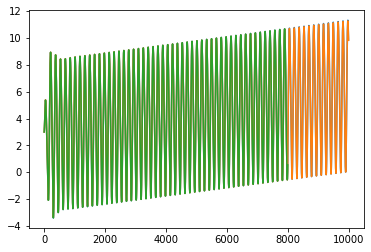

In [29]:
out_1=model_rnn.predict(train_images)
out_2=model_rnn.predict(test_images)
print(out_1.shape)
print(out_2.shape)
out_all=np.concatenate((out_1,out_2),axis=0)
out_all_original=np.concatenate((outputs_seq,outputs_seq_t),axis=0)
plt.plot(out_all*cdeno+c)
plt.plot(out_all_original*cdeno+c)
plt.plot(out_1*cdeno+c)
plt.show

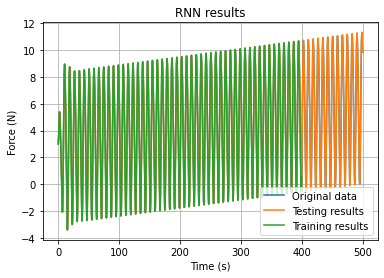

In [30]:
plt.title("RNN results")
#plt.plot(K_load*100)
plt.plot(inputs[6:,0],out_all_original*cdeno+c)
plt.plot(inputs[6:,0],out_all*cdeno+c)
plt.plot(inputs[3:8000,0],out_1*cdeno+c)
plt.legend(['Original data','Testing results','Training results'])
plt.xlabel("Time (s)")
plt.ylabel("Force (N)")
plt.grid()
plt.show()
plt.close()

In [32]:
print(np.mean((np.abs(out_all[:8000]*cdeno+c-(out_all_original[:8000]*cdeno+c)))/(np.abs(out_all_original[:8000]*cdeno+c))))

0.01383737164714739


In [33]:
print(np.mean((np.abs(out_all[8000:]*cdeno+c-(out_all_original[8000:]*cdeno+c)))/(np.abs(out_all_original[8000:]*cdeno+c))))

0.021810359390189
